## Making trials for highest 3 variances of subcarriers

 Trials will be saved in: D:/PROJECT/Dataset/Trials_Subj-1_Area-1_Act-1
 Total subcarriers: 360
 Top 3 subcarriers with highest variance:
  1. 13 (Variance = 41.94)
  2. 16 (Variance = 28.52)
  3. 205 (Variance = 22.34)

 Processing subcarrier: 13
 Detected 3 trials for 13:
 Saved D:/PROJECT/Dataset/Trials_Subj-1_Area-1_Act-1\trial_13_1110_1274.csv (range 1110-1274)
 Saved D:/PROJECT/Dataset/Trials_Subj-1_Area-1_Act-1\trial_13_1336_1681.csv (range 1336-1681)
 Saved D:/PROJECT/Dataset/Trials_Subj-1_Area-1_Act-1\trial_13_1736_1874.csv (range 1736-1874)


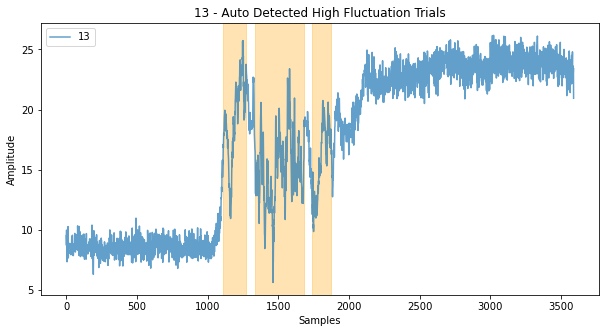


 Processing subcarrier: 16
 Detected 2 trials for 16:
 Saved D:/PROJECT/Dataset/Trials_Subj-1_Area-1_Act-1\trial_16_1111_1261.csv (range 1111-1261)
 Saved D:/PROJECT/Dataset/Trials_Subj-1_Area-1_Act-1\trial_16_1510_1885.csv (range 1510-1885)


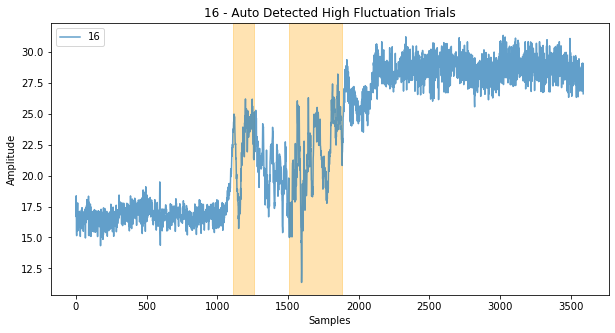


 Processing subcarrier: 205
 Detected 3 trials for 205:
 Saved D:/PROJECT/Dataset/Trials_Subj-1_Area-1_Act-1\trial_205_1117_1279.csv (range 1117-1279)
 Saved D:/PROJECT/Dataset/Trials_Subj-1_Area-1_Act-1\trial_205_1343_1714.csv (range 1343-1714)
 Saved D:/PROJECT/Dataset/Trials_Subj-1_Area-1_Act-1\trial_205_1740_1860.csv (range 1740-1860)


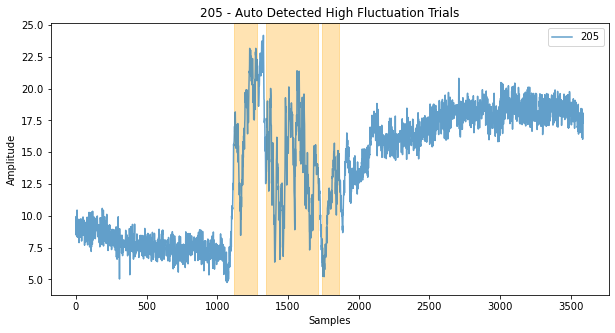

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# ====== Step 1: Load your CSV file ======
file_path = "D:/PROJECT/Dataset/DatasetCSV/Subj-1_Area-1_Act-1.csv"
df = pd.read_csv(file_path)

# ====== Step 2: Folder to save trials ======
save_path = "D:/PROJECT/Dataset/Trials_Subj-1_Area-1_Act-1"
os.makedirs(save_path, exist_ok=True)
print(f" Trials will be saved in: {save_path}")

# ====== Step 3: Find top 3 subcarriers with highest variance ======
variances = df.var(axis=0)
top_subs = variances.nlargest(3).index   # top 3 subcarriers
print(f" Total subcarriers: {len(df.columns)}")
print(" Top 3 subcarriers with highest variance:")
for i, sub in enumerate(top_subs, start=1):
    print(f"  {i}. {sub} (Variance = {variances[sub]:.2f})")

# ====== Step 4: Loop through each subcarrier ======
window_size = 100  # adjust depending on signal smoothness
for sub in top_subs:
    print(f"\n Processing subcarrier: {sub}")
    signal = df[sub].values
    rolling_std = pd.Series(signal).rolling(window=window_size).std()

    # Detect high-fluctuation regions
    threshold = rolling_std.mean() + rolling_std.std()
    high_var = rolling_std > threshold

    segments = []
    in_segment = False
    start = None

    for i, val in enumerate(high_var):
        if val and not in_segment:
            start = i
            in_segment = True
        elif not val and in_segment:
            end = i
            if end - start > window_size:
                segments.append((start, end))
            in_segment = False

    if in_segment:
        segments.append((start, len(signal)))

    # Save each detected region as a trial
    print(f" Detected {len(segments)} trials for {sub}:")
    for idx, (start_idx, end_idx) in enumerate(segments, start=1):
        trial = df.loc[start_idx:end_idx, [sub]]
        filename = os.path.join(save_path, f"trial_{sub}_{start_idx}_{end_idx}.csv")
        trial.to_csv(filename, index=False)
        print(f" Saved {filename} (range {start_idx}-{end_idx})")

    # Plot the signal with shaded trials
    plt.figure(figsize=(10, 5))
    plt.plot(signal, label=f'{sub}', alpha=0.7)
    for (start, end) in segments:
        plt.axvspan(start, end, color='orange', alpha=0.3)
    plt.title(f"{sub} - Auto Detected High Fluctuation Trials")
    plt.xlabel("Samples")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.show()


## Making trials for highest 3 variances of subcarriers

 Trials will be saved in: D:/PROJECT/Dataset/Trials_Subj-1_Area-1_Act-2
 Total subcarriers: 360
 Top 3 subcarriers with highest variance:
  1. 343 (Variance = 22.43)
  2. 250 (Variance = 21.45)
  3. 253 (Variance = 21.29)

 Processing subcarrier: 343
 Detected 4 trials for 343:
 Saved D:/PROJECT/Dataset/Trials_Subj-1_Area-1_Act-2\trial_343_2854_3023.csv (range 2854-3023)
 Saved D:/PROJECT/Dataset/Trials_Subj-1_Area-1_Act-2\trial_343_7517_7694.csv (range 7517-7694)
 Saved D:/PROJECT/Dataset/Trials_Subj-1_Area-1_Act-2\trial_343_11058_11168.csv (range 11058-11168)
 Saved D:/PROJECT/Dataset/Trials_Subj-1_Area-1_Act-2\trial_343_15200_15331.csv (range 15200-15331)


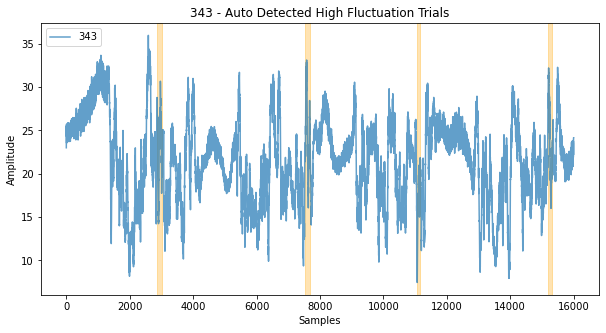


 Processing subcarrier: 250
 Detected 5 trials for 250:
 Saved D:/PROJECT/Dataset/Trials_Subj-1_Area-1_Act-2\trial_250_1387_1517.csv (range 1387-1517)
 Saved D:/PROJECT/Dataset/Trials_Subj-1_Area-1_Act-2\trial_250_2832_2942.csv (range 2832-2942)
 Saved D:/PROJECT/Dataset/Trials_Subj-1_Area-1_Act-2\trial_250_9267_9387.csv (range 9267-9387)
 Saved D:/PROJECT/Dataset/Trials_Subj-1_Area-1_Act-2\trial_250_10389_10509.csv (range 10389-10509)
 Saved D:/PROJECT/Dataset/Trials_Subj-1_Area-1_Act-2\trial_250_14915_15049.csv (range 14915-15049)


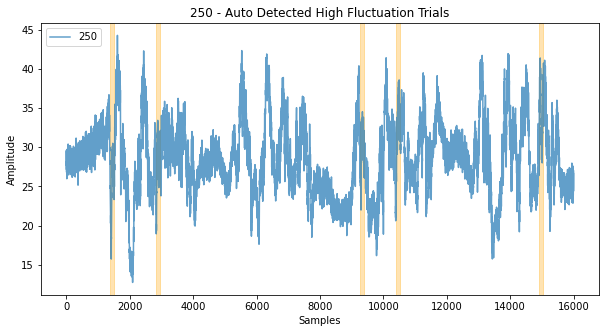


 Processing subcarrier: 253
 Detected 5 trials for 253:
 Saved D:/PROJECT/Dataset/Trials_Subj-1_Area-1_Act-2\trial_253_1377_1511.csv (range 1377-1511)
 Saved D:/PROJECT/Dataset/Trials_Subj-1_Area-1_Act-2\trial_253_2792_2956.csv (range 2792-2956)
 Saved D:/PROJECT/Dataset/Trials_Subj-1_Area-1_Act-2\trial_253_13744_13865.csv (range 13744-13865)
 Saved D:/PROJECT/Dataset/Trials_Subj-1_Area-1_Act-2\trial_253_14987_15112.csv (range 14987-15112)
 Saved D:/PROJECT/Dataset/Trials_Subj-1_Area-1_Act-2\trial_253_15254_15375.csv (range 15254-15375)


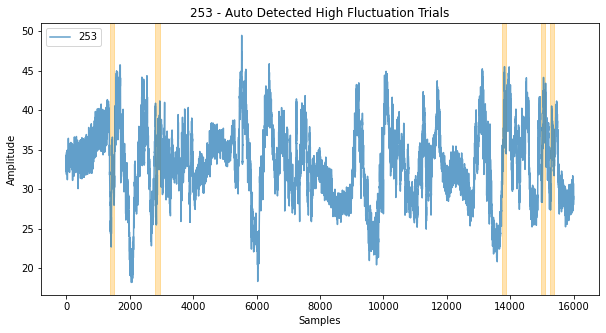

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# ====== Step 1: Load your CSV file ======
file_path = "D:/PROJECT/Dataset/DatasetCSV/Subj-1_Area-1_Act-2.csv"
df = pd.read_csv(file_path)

# ====== Step 2: Folder to save trials ======
save_path = "D:/PROJECT/Dataset/Trials_Subj-1_Area-1_Act-2"
os.makedirs(save_path, exist_ok=True)
print(f" Trials will be saved in: {save_path}")

# ====== Step 3: Find top 3 subcarriers with highest variance ======
variances = df.var(axis=0)
top_subs = variances.nlargest(3).index   # top 3 subcarriers
print(f" Total subcarriers: {len(df.columns)}")
print(" Top 3 subcarriers with highest variance:")
for i, sub in enumerate(top_subs, start=1):
    print(f"  {i}. {sub} (Variance = {variances[sub]:.2f})")

# ====== Step 4: Loop through each subcarrier ======
window_size = 100  # adjust depending on signal smoothness
for sub in top_subs:
    print(f"\n Processing subcarrier: {sub}")
    signal = df[sub].values
    rolling_std = pd.Series(signal).rolling(window=window_size).std()

    # Detect high-fluctuation regions
    threshold = rolling_std.mean() + rolling_std.std()
    high_var = rolling_std > threshold

    segments = []
    in_segment = False
    start = None

    for i, val in enumerate(high_var):
        if val and not in_segment:
            start = i
            in_segment = True
        elif not val and in_segment:
            end = i
            if end - start > window_size:
                segments.append((start, end))
            in_segment = False

    if in_segment:
        segments.append((start, len(signal)))

    # Save each detected region as a trial
    print(f" Detected {len(segments)} trials for {sub}:")
    for idx, (start_idx, end_idx) in enumerate(segments, start=1):
        trial = df.loc[start_idx:end_idx, [sub]]
        filename = os.path.join(save_path, f"trial_{sub}_{start_idx}_{end_idx}.csv")
        trial.to_csv(filename, index=False)
        print(f" Saved {filename} (range {start_idx}-{end_idx})")

    # Plot the signal with shaded trials
    plt.figure(figsize=(10, 5))
    plt.plot(signal, label=f'{sub}', alpha=0.7)
    for (start, end) in segments:
        plt.axvspan(start, end, color='orange', alpha=0.3)
    plt.title(f"{sub} - Auto Detected High Fluctuation Trials")
    plt.xlabel("Samples")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.show()


## Making trials for highest 3 variances of subcarriers for Subj-1_Area-1_Act-3

 Trials will be saved in: D:/PROJECT/Dataset/Trials_Subj-1_Area-1_Act-3
 Total subcarriers: 360
 Top 3 subcarriers with highest variance:
  1. 349 (Variance = 23.10)
  2. 79 (Variance = 19.61)
  3. 346 (Variance = 19.20)

 Processing subcarrier: 349
 Detected 9 trials for 349:
 Saved D:/PROJECT/Dataset/Trials_Subj-1_Area-1_Act-3\trial_349_6910_7038.csv (range 6910-7038)
 Saved D:/PROJECT/Dataset/Trials_Subj-1_Area-1_Act-3\trial_349_8061_8221.csv (range 8061-8221)
 Saved D:/PROJECT/Dataset/Trials_Subj-1_Area-1_Act-3\trial_349_10249_10416.csv (range 10249-10416)
 Saved D:/PROJECT/Dataset/Trials_Subj-1_Area-1_Act-3\trial_349_11241_11416.csv (range 11241-11416)
 Saved D:/PROJECT/Dataset/Trials_Subj-1_Area-1_Act-3\trial_349_12539_12785.csv (range 12539-12785)
 Saved D:/PROJECT/Dataset/Trials_Subj-1_Area-1_Act-3\trial_349_14910_15176.csv (range 14910-15176)
 Saved D:/PROJECT/Dataset/Trials_Subj-1_Area-1_Act-3\trial_349_15872_16003.csv (range 15872-16003)
 Saved D:/PROJECT/Dataset/Trials_Subj

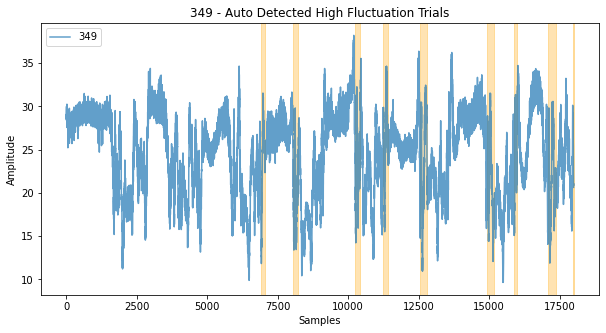


 Processing subcarrier: 79
 Detected 12 trials for 79:
 Saved D:/PROJECT/Dataset/Trials_Subj-1_Area-1_Act-3\trial_79_5880_6015.csv (range 5880-6015)
 Saved D:/PROJECT/Dataset/Trials_Subj-1_Area-1_Act-3\trial_79_6909_7035.csv (range 6909-7035)
 Saved D:/PROJECT/Dataset/Trials_Subj-1_Area-1_Act-3\trial_79_8062_8216.csv (range 8062-8216)
 Saved D:/PROJECT/Dataset/Trials_Subj-1_Area-1_Act-3\trial_79_9094_9268.csv (range 9094-9268)
 Saved D:/PROJECT/Dataset/Trials_Subj-1_Area-1_Act-3\trial_79_10204_10416.csv (range 10204-10416)
 Saved D:/PROJECT/Dataset/Trials_Subj-1_Area-1_Act-3\trial_79_11234_11457.csv (range 11234-11457)
 Saved D:/PROJECT/Dataset/Trials_Subj-1_Area-1_Act-3\trial_79_12488_12699.csv (range 12488-12699)
 Saved D:/PROJECT/Dataset/Trials_Subj-1_Area-1_Act-3\trial_79_13521_13709.csv (range 13521-13709)
 Saved D:/PROJECT/Dataset/Trials_Subj-1_Area-1_Act-3\trial_79_14876_15057.csv (range 14876-15057)
 Saved D:/PROJECT/Dataset/Trials_Subj-1_Area-1_Act-3\trial_79_15882_16067.csv 

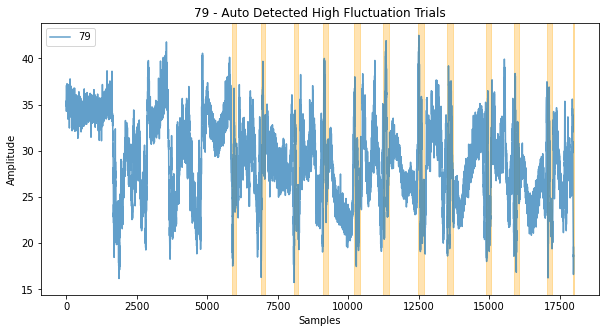


 Processing subcarrier: 346
 Detected 10 trials for 346:
 Saved D:/PROJECT/Dataset/Trials_Subj-1_Area-1_Act-3\trial_346_1687_1800.csv (range 1687-1800)
 Saved D:/PROJECT/Dataset/Trials_Subj-1_Area-1_Act-3\trial_346_2805_2936.csv (range 2805-2936)
 Saved D:/PROJECT/Dataset/Trials_Subj-1_Area-1_Act-3\trial_346_5892_6022.csv (range 5892-6022)
 Saved D:/PROJECT/Dataset/Trials_Subj-1_Area-1_Act-3\trial_346_6914_7034.csv (range 6914-7034)
 Saved D:/PROJECT/Dataset/Trials_Subj-1_Area-1_Act-3\trial_346_8061_8224.csv (range 8061-8224)
 Saved D:/PROJECT/Dataset/Trials_Subj-1_Area-1_Act-3\trial_346_10257_10424.csv (range 10257-10424)
 Saved D:/PROJECT/Dataset/Trials_Subj-1_Area-1_Act-3\trial_346_12495_12779.csv (range 12495-12779)
 Saved D:/PROJECT/Dataset/Trials_Subj-1_Area-1_Act-3\trial_346_14908_15103.csv (range 14908-15103)
 Saved D:/PROJECT/Dataset/Trials_Subj-1_Area-1_Act-3\trial_346_17054_17293.csv (range 17054-17293)
 Saved D:/PROJECT/Dataset/Trials_Subj-1_Area-1_Act-3\trial_346_17965_17

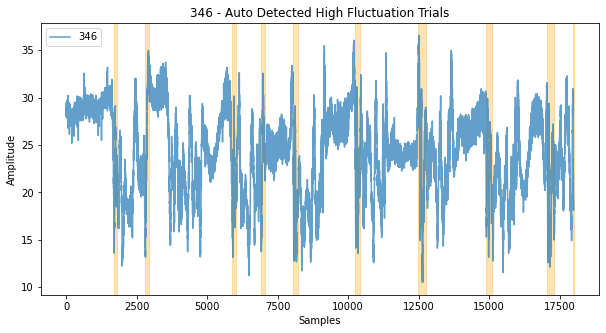

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# ====== Step 1: Load your CSV file ======
file_path = "D:/PROJECT/Dataset/DatasetCSV/Subj-1_Area-1_Act-3.csv"
df = pd.read_csv(file_path)

# ====== Step 2: Folder to save trials ======
save_path = "D:/PROJECT/Dataset/Trials_Subj-1_Area-1_Act-3"
os.makedirs(save_path, exist_ok=True)
print(f" Trials will be saved in: {save_path}")

# ====== Step 3: Find top 3 subcarriers with highest variance ======
variances = df.var(axis=0)
top_subs = variances.nlargest(3).index   # top 3 subcarriers
print(f" Total subcarriers: {len(df.columns)}")
print(" Top 3 subcarriers with highest variance:")
for i, sub in enumerate(top_subs, start=1):
    print(f"  {i}. {sub} (Variance = {variances[sub]:.2f})")

# ====== Step 4: Loop through each subcarrier ======
window_size = 100  # adjust depending on signal smoothness
for sub in top_subs:
    print(f"\n Processing subcarrier: {sub}")
    signal = df[sub].values
    rolling_std = pd.Series(signal).rolling(window=window_size).std()

    # Detect high-fluctuation regions
    threshold = rolling_std.mean() + rolling_std.std()
    high_var = rolling_std > threshold

    segments = []
    in_segment = False
    start = None

    for i, val in enumerate(high_var):
        if val and not in_segment:
            start = i
            in_segment = True
        elif not val and in_segment:
            end = i
            if end - start > window_size:
                segments.append((start, end))
            in_segment = False

    if in_segment:
        segments.append((start, len(signal)))

    # Save each detected region as a trial
    print(f" Detected {len(segments)} trials for {sub}:")
    for idx, (start_idx, end_idx) in enumerate(segments, start=1):
        trial = df.loc[start_idx:end_idx, [sub]]
        filename = os.path.join(save_path, f"trial_{sub}_{start_idx}_{end_idx}.csv")
        trial.to_csv(filename, index=False)
        print(f" Saved {filename} (range {start_idx}-{end_idx})")

    # Plot the signal with shaded trials
    plt.figure(figsize=(10, 5))
    plt.plot(signal, label=f'{sub}', alpha=0.7)
    for (start, end) in segments:
        plt.axvspan(start, end, color='orange', alpha=0.3)
    plt.title(f"{sub} - Auto Detected High Fluctuation Trials")
    plt.xlabel("Samples")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.show()


## Making trials for highest 3 variances of subcarriers for all the activities

In [ ]:
import os
import pandas as pd
import numpy as np

# ---------- Paths ----------
input_folder = "D:/PROJECT/Dataset/DatasetCSV"
output_base = "D:/PROJECT/Dataset"

# ---------- Parameters ----------
window_size = 100  # for rolling std
threshold_factor = 1.5  # threshold multiplier

# ---------- Function to find trials ----------
def find_trials(signal, window_size=100, threshold_factor=1.5):
    rolling_std = pd.Series(signal).rolling(window=window_size).std().fillna(0)
    threshold = rolling_std.mean() + threshold_factor * rolling_std.std()
    high_var = rolling_std > threshold

    trials = []
    start = None
    for i, active in enumerate(high_var):
        if active and start is None:
            start = i
        elif not active and start is not None:
            end = i
            if end - start > window_size:  # avoid very small noise regions
                trials.append((start, end))
            start = None
    if start is not None:
        trials.append((start, len(signal)))
    return trials

# ---------- Main processing ----------
for file in os.listdir(input_folder):
    if file.endswith(".csv"):
        file_path = os.path.join(input_folder, file)
        print(f"Processing: {file}")

        # Read CSV
        df = pd.read_csv(file_path)
        df = df.select_dtypes(include=[np.number])  # keep only numeric columns

        # Calculate variance for each subcarrier
        variances = df.var(axis=0)
        top3_indices = variances.nlargest(3).index  # top 3 subcarriers

        # Create output folder for this CSV
        file_name = os.path.splitext(file)[0]  # e.g. Subj-1_Area-1_Act-1
        output_folder = os.path.join(output_base, f"Trials_{file_name}")
        os.makedirs(output_folder, exist_ok=True)

        # Extract trials for each top subcarrier
        for sub_idx in top3_indices:
            signal = df[sub_idx].values
            trials = find_trials(signal, window_size, threshold_factor)

            for i, (start, end) in enumerate(trials, start=1):
                trial_data = df.iloc[start:end]
                trial_filename = f"trial_subcarrier_{sub_idx}_trial_{i}.csv"
                trial_path = os.path.join(output_folder, trial_filename)
                trial_data.to_csv(trial_path, index=False)

        print(f"Trials saved in: {output_folder}")

print("\n All CSV files processed successfully.")


Processing: subcarrier_variance_report.csv
Trials saved in: D:/PROJECT/Dataset\Trials_subcarrier_variance_report
Processing: Subj-10_Area-1_Act-1.csv
Trials saved in: D:/PROJECT/Dataset\Trials_Subj-10_Area-1_Act-1
Processing: Subj-10_Area-1_Act-10.csv
Trials saved in: D:/PROJECT/Dataset\Trials_Subj-10_Area-1_Act-10
Processing: Subj-10_Area-1_Act-2.csv
Trials saved in: D:/PROJECT/Dataset\Trials_Subj-10_Area-1_Act-2
Processing: Subj-10_Area-1_Act-3.csv
Trials saved in: D:/PROJECT/Dataset\Trials_Subj-10_Area-1_Act-3
Processing: Subj-10_Area-1_Act-4.csv
Trials saved in: D:/PROJECT/Dataset\Trials_Subj-10_Area-1_Act-4
Processing: Subj-10_Area-1_Act-5.csv
Trials saved in: D:/PROJECT/Dataset\Trials_Subj-10_Area-1_Act-5
Processing: Subj-10_Area-1_Act-6.csv
Trials saved in: D:/PROJECT/Dataset\Trials_Subj-10_Area-1_Act-6
Processing: Subj-10_Area-1_Act-7.csv
Trials saved in: D:/PROJECT/Dataset\Trials_Subj-10_Area-1_Act-7
Processing: Subj-10_Area-1_Act-8.csv
Trials saved in: D:/PROJECT/Dataset\Tria

## making separate activity folder for each activities

In [3]:
import os
import shutil

# Input folder (where all 300 trial folders are)
input_base = "D:/PROJECT/Dataset/All Trials"
# Output base folder (where 10 activity folders will be created)
output_base = "D:/PROJECT/Dataset/Separate Activities"

# Create 10 activity folders
for i in range(1, 11):
    os.makedirs(os.path.join(output_base, f"Activity_{i}"), exist_ok=True)

# Loop through all subfolders in All Trials
for folder in os.listdir(input_base):
    folder_path = os.path.join(input_base, folder)
    if os.path.isdir(folder_path) and folder.startswith("Trials_"):
        # Example: Trials_Subj-1_Area-1_Act-1
        parts = folder.split('_')
        act_part = [p for p in parts if p.startswith("Act-")]
        if act_part:
            act_num = act_part[0].split('-')[1]  # Extract activity number
            dest_folder = os.path.join(output_base, f"Activity_{act_num}", folder)

            # Copy the entire folder (with all its CSVs)
            shutil.copytree(folder_path, dest_folder, dirs_exist_ok=True)

            print(f" Moved {folder} → Activity_{act_num}/")

print("\n All trial folders grouped successfully by activity!")


 Moved Trials_Subj-10_Area-1_Act-1 → Activity_1/
 Moved Trials_Subj-10_Area-1_Act-10 → Activity_10/
 Moved Trials_Subj-10_Area-1_Act-2 → Activity_2/
 Moved Trials_Subj-10_Area-1_Act-3 → Activity_3/
 Moved Trials_Subj-10_Area-1_Act-4 → Activity_4/
 Moved Trials_Subj-10_Area-1_Act-5 → Activity_5/
 Moved Trials_Subj-10_Area-1_Act-6 → Activity_6/
 Moved Trials_Subj-10_Area-1_Act-7 → Activity_7/
 Moved Trials_Subj-10_Area-1_Act-8 → Activity_8/
 Moved Trials_Subj-10_Area-1_Act-9 → Activity_9/
 Moved Trials_Subj-10_Area-2_Act-1 → Activity_1/
 Moved Trials_Subj-10_Area-2_Act-10 → Activity_10/
 Moved Trials_Subj-10_Area-2_Act-2 → Activity_2/
 Moved Trials_Subj-10_Area-2_Act-3 → Activity_3/
 Moved Trials_Subj-10_Area-2_Act-4 → Activity_4/
 Moved Trials_Subj-10_Area-2_Act-5 → Activity_5/
 Moved Trials_Subj-10_Area-2_Act-6 → Activity_6/
 Moved Trials_Subj-10_Area-2_Act-7 → Activity_7/
 Moved Trials_Subj-10_Area-2_Act-8 → Activity_8/
 Moved Trials_Subj-10_Area-2_Act-9 → Activity_9/
 Moved Trials_Su

## making csv file for each activity irrespective of area and person and a combined csv for all activities

In [2]:
import os
import pandas as pd

# Base folder where Activity_1 ... Activity_10 exist
base_folder = "D:/PROJECT/Dataset/Separate Activities"   # change if needed
combined_data = []

# Loop through all activity folders
for activity_num in range(1, 11):  # Activity 1 to 10
    activity_folder = os.path.join(base_folder, f"Activity_{activity_num}")
    
    if not os.path.exists(activity_folder):
        print(f" Folder not found: {activity_folder}")
        continue

    print(f" Processing Activity {activity_num} ...")
    activity_data = []

    # Walk through all subfolders (recursive search)
    for root, _, files in os.walk(activity_folder):
        for file in files:
            if file.endswith(".csv"):
                file_path = os.path.join(root, file)
                df = pd.read_csv(file_path)
                df["Activity"] = activity_num  # Label the activity
                activity_data.append(df)

    # Merge all CSVs for this activity
    if activity_data:
        merged_df = pd.concat(activity_data, ignore_index=True)

        # Save individual merged file for this activity
        activity_output = os.path.join(base_folder, f"Activity_{activity_num}.csv")
        merged_df.to_csv(activity_output, index=False)
        print(f" Saved merged file: {activity_output} ({len(merged_df)} rows)")

        # Add to combined dataset list
        combined_data.append(merged_df)
    else:
        print(f" No CSVs found in {activity_folder}")

# Combine all activities into one master file
if combined_data:
    all_activities_df = pd.concat(combined_data, ignore_index=True)
    final_output = os.path.join(base_folder, "All_Activities.csv")
    all_activities_df.to_csv(final_output, index=False)
    print(f"\n All activities merged into one file:")
    print(f" {final_output} ({len(all_activities_df)} total rows)")
else:
    print("No data found in any activity folder.")

 Processing Activity 1 ...
 Saved merged file: D:/PROJECT/Dataset/Separate Activities\Activity_1.csv (23806 rows)
 Processing Activity 2 ...
 Saved merged file: D:/PROJECT/Dataset/Separate Activities\Activity_2.csv (30829 rows)
 Processing Activity 3 ...
 Saved merged file: D:/PROJECT/Dataset/Separate Activities\Activity_3.csv (41213 rows)
 Processing Activity 4 ...
 Saved merged file: D:/PROJECT/Dataset/Separate Activities\Activity_4.csv (88729 rows)
 Processing Activity 5 ...
 Saved merged file: D:/PROJECT/Dataset/Separate Activities\Activity_5.csv (47177 rows)
 Processing Activity 6 ...
 Saved merged file: D:/PROJECT/Dataset/Separate Activities\Activity_6.csv (76207 rows)
 Processing Activity 7 ...
 Saved merged file: D:/PROJECT/Dataset/Separate Activities\Activity_7.csv (42118 rows)
 Processing Activity 8 ...
 Saved merged file: D:/PROJECT/Dataset/Separate Activities\Activity_8.csv (83787 rows)
 Processing Activity 9 ...
 Saved merged file: D:/PROJECT/Dataset/Separate Activities\Ac

In [1]:
import pandas as pd

df = pd.read_csv("D:/PROJECT/Dataset/Separate Activities/All_Activities.csv")
print("Rows:", len(df))
print("Columns:", df.shape[1])
print("Preview:\n", df.head())

Rows: 547913
Columns: 361
Preview:
            0          1         2          3          4         5          6  \
0  18.073202  18.246650  7.465869  22.002917  19.384436  7.625449  24.025968   
1  18.388954  16.454211  7.098850  21.035943  17.464873  7.258120  23.560844   
2  19.261217  15.322663  7.291119  22.472065  16.065906  6.875369  24.626590   
3  18.754889  16.084174  6.989266  22.196819  16.810314  6.598683  23.784401   
4  18.900982  15.870929  7.082603  21.181804  17.453512  7.437102  23.469995   

           7         8          9  ...        351       352        353  \
0  13.345309  8.705307  27.103857  ...  25.105587  5.968391  32.422082   
1  11.763525  9.014679  27.088122  ...  25.930243  6.184563  31.842294   
2  10.758409  8.851520  27.446913  ...  22.792432  7.683239  31.585686   
3  12.399098  8.306623  26.052412  ...  17.525547  8.952600  30.889409   
4  12.497901  8.319877  26.541748  ...  19.754389  6.583775  31.638361   

         354       355        356     

In [2]:
import os
import pandas as pd

base_folder = "D:/PROJECT/Dataset/Separate Activities"

records = []

for activity_num in range(1, 11):

    activity_folder = os.path.join(base_folder, f"Activity_{activity_num}")
    print(f"Processing Activity {activity_num}")

    if not os.path.exists(activity_folder):
        print("Folder not found!", activity_folder)
        continue

    # Walk through all subfolders
    for root, dirs, files in os.walk(activity_folder):
        for file in files:
            if file.endswith(".csv"):
                file_path = os.path.join(root, file)
                df = pd.read_csv(file_path)

                # store full CSV + activity label
                records.append({
                    "data": df,
                    "label": activity_num
                })

dataset_df = pd.DataFrame(records)
print(dataset_df.head())

print("\nTotal records loaded:", len(dataset_df))


Processing Activity 1
Processing Activity 2
Processing Activity 3
Processing Activity 4
Processing Activity 5
Processing Activity 6
Processing Activity 7
Processing Activity 8
Processing Activity 9
Processing Activity 10
                                                data  label
0               0          1         2          3...      1
1               0          1         2          3...      1
2               0          1         2          3...      1
3               0          1         2          3...      1
4               0          1         2          3...      1

Total records loaded: 3844


In [1]:
import os
import pandas as pd
import numpy as np

def load_csv_matrices(parent_folder):
    data_rows = []

    # iterate through all subfolders
    for folder in os.listdir(parent_folder):
        folder_path = os.path.join(parent_folder, folder)
        
        if not os.path.isdir(folder_path):
            continue
        
        label = folder  # folder name is the label
        
        # read CSV files inside this folder
        for file in os.listdir(folder_path):
            if file.endswith(".csv"):
                file_path = os.path.join(folder_path, file)

                # read CSV as a 100x180 matrix, do NOT reshape
                matrix = pd.read_csv(file_path, header=None).values

                # ensure shape is preserved
                if matrix.shape != (100, 180):
                    print(f"Warning: {file_path} shape is {matrix.shape}, expected 100x180.")

                data_rows.append({
                    "label": label,
                    "filename": file,
                    "matrix": matrix
                })

    df = pd.DataFrame(data_rows)
    return df


# --------- Usage ----------
parent_directory = "D:/PROJECT/Dataset/Separate Activities/Activity_1"
df = load_csv_matrices(parent_directory)

print(df.head())
print("Total CSV files loaded:", len(df))

                         label                          filename  \
0  Trials_Subj-10_Area-1_Act-1  trial_subcarrier_157_trial_1.csv   
1  Trials_Subj-10_Area-1_Act-1  trial_subcarrier_346_trial_1.csv   
2  Trials_Subj-10_Area-1_Act-1  trial_subcarrier_349_trial_1.csv   
3  Trials_Subj-10_Area-2_Act-1  trial_subcarrier_162_trial_1.csv   
4  Trials_Subj-10_Area-2_Act-1  trial_subcarrier_162_trial_2.csv   

                                              matrix  
0  [[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0,...  
1  [[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0,...  
2  [[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0,...  
3  [[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0,...  
4  [[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0,...  
Total CSV files loaded: 138


## merging trials to reduce folders

In [1]:
import os
import shutil

# Original source folders
source_root = r"D:/PROJECT/Dataset/Separate Activities"

# NEW output root where you want flattened folders
output_root = r"D:/PROJECT/Dataset/MergedActivities"

os.makedirs(output_root, exist_ok=True)

for activity in os.listdir(source_root):
    activity_path = os.path.join(source_root, activity)
    if not os.path.isdir(activity_path):
        continue

    print(f"Processing {activity} ...")

    # Create output folder for this activity
    activity_output = os.path.join(output_root, activity)
    os.makedirs(activity_output, exist_ok=True)

    # Loop inside Activity folder
    for subfolder in os.listdir(activity_path):
        subfolder_path = os.path.join(activity_path, subfolder)

        # We only process folders like: Trials_Subj-1_Area-1_Act-1
        if os.path.isdir(subfolder_path) and subfolder.startswith("Trials_"):

            # Extract Subj and Area from folder name
            parts = subfolder.split("_")
            subj = parts[1]     # Subj-1
            area = parts[2]     # Area-1

            for file in os.listdir(subfolder_path):
                if file.endswith(".csv"):

                    src = os.path.join(subfolder_path, file)

                    # NEW filename → just add Subj and Area
                    new_filename = f"{subj}_{area}_{file}"

                    dest = os.path.join(activity_output, new_filename)

                    # Copy file to new structure
                    shutil.copy(src, dest)

print("\n Done! All CSVs flattened into new activity folders.")

Processing Activity_1 ...
Processing Activity_10 ...
Processing Activity_2 ...
Processing Activity_3 ...
Processing Activity_4 ...
Processing Activity_5 ...
Processing Activity_6 ...
Processing Activity_7 ...
Processing Activity_8 ...
Processing Activity_9 ...

 Done! All CSVs flattened into new activity folders.


## making uniform csvs files (100*360)

In [1]:
import os
import pandas as pd
import numpy as np

# -----------------------------
# Function to fix matrix size
# -----------------------------
def fix_matrix_size(matrix, target_rows=100, target_cols=360):

    rows, cols = matrix.shape

    # ---- Fix columns ----
    if cols < target_cols:
        pad_cols = target_cols - cols
        matrix = np.hstack([matrix, np.zeros((rows, pad_cols))])

    elif cols > target_cols:
        matrix = matrix[:, :target_cols]

    # ---- Fix rows ----
    if rows < target_rows:
        pad_rows = target_rows - rows
        matrix = np.vstack([matrix, np.zeros((pad_rows, target_cols))])

    elif rows > target_rows:
        start = (rows - target_rows) // 2
        end = start + target_rows
        matrix = matrix[start:end, :]

    return matrix


# -----------------------------
# Main processing function
# -----------------------------
def resize_and_save(input_root, output_root):

    # Create output root folder if not exists
    os.makedirs(output_root, exist_ok=True)

    for activity in os.listdir(input_root):
        activity_path = os.path.join(input_root, activity)

        if not os.path.isdir(activity_path):
            continue

        # Make output folder for this activity
        out_activity_folder = os.path.join(output_root, activity)
        os.makedirs(out_activity_folder, exist_ok=True)

        # Traverse through all subfolders (Trials_Subj_x_Area_y)
        for subfolder in os.listdir(activity_path):
            sub_path = os.path.join(activity_path, subfolder)

            if not os.path.isdir(sub_path):
                continue

            # Read all CSVs inside trial folders
            for file in os.listdir(sub_path):
                if file.endswith(".csv"):
                    file_path = os.path.join(sub_path, file)

                    # Read CSV to matrix
                    matrix = pd.read_csv(file_path, header=None).values

                    # Resize to 100x360
                    matrix = fix_matrix_size(matrix, 100, 360)

                    # Save to new path
                    new_filename = f"{subfolder}_{file}"  # adds subject/area info
                    output_file = os.path.join(out_activity_folder, new_filename)

                    pd.DataFrame(matrix).to_csv(output_file, index=False, header=False)

        print(f"Done → {activity}")


# -----------------------------
# USAGE
# -----------------------------
input_path = r"D:/PROJECT/Dataset/Separate Activities"
output_path = r"D:/PROJECT/Dataset/Resized_Activities"

resize_and_save(input_path, output_path)

print("ALL FILES RESIZED & SAVED SUCCESSFULLY!")


Done → Activity_1
Done → Activity_10
Done → Activity_2
Done → Activity_3
Done → Activity_4
Done → Activity_5
Done → Activity_6
Done → Activity_7
Done → Activity_8
Done → Activity_9
ALL FILES RESIZED & SAVED SUCCESSFULLY!


## making dataframe

In [1]:
import os
import pandas as pd

def build_activity_dataframe(parent_folder):
    rows = []

    for activity in os.listdir(parent_folder):
        activity_path = os.path.join(parent_folder, activity)

        if not os.path.isdir(activity_path):
            continue

        # Extract activity number: "Activity_1" → 1
        activity_num = int(activity.split("_")[1])

        for file in os.listdir(activity_path):
            if file.endswith(".csv"):
                file_path = os.path.join(activity_path, file)

                # Read matrix (100 × 360)
                matrix = pd.read_csv(file_path, header=None).values

                rows.append({
                    "Activity": activity_num,
                    "Matrix": matrix
                })

    df = pd.DataFrame(rows)
    return df


# -------- Usage --------
parent_dir = r"D:/PROJECT/Dataset/Resized_Activities"
df = build_activity_dataframe(parent_dir)

print(df.head())
print("\nTotal samples loaded:", len(df))


   Activity                                             Matrix
0         1  [[20.084027652826865, 19.719656206413944, 6.98...
1         1  [[20.321905229349447, 20.24197399023708, 7.800...
2         1  [[19.1127841076676, 20.08191876442749, 7.09181...
3         1  [[21.27302232271727, 12.53655155158857, 2.1442...
4         1  [[19.576205858419808, 16.145092509803987, 2.34...

Total samples loaded: 3844


In [2]:
print(df["Activity"].unique())


[ 1 10  2  3  4  5  6  7  8  9]


In [3]:
df["Activity"].value_counts()

4     600
8     580
6     520
9     448
5     349
10    328
7     317
3     316
2     248
1     138
Name: Activity, dtype: int64

In [6]:
df.to_csv("D:/PROJECT/Dataset/final_dataset.csv", index=False)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3844 entries, 0 to 3843
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Activity  3844 non-null   int64 
 1   Matrix    3844 non-null   object
dtypes: int64(1), object(1)
memory usage: 60.2+ KB


## applying CNN

In [8]:
import pandas as pd
import numpy as np
import ast
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [9]:
df = pd.read_csv("D:/PROJECT/Dataset/final_dataset.csv")

In [10]:
X = []
y = df["Activity"].values

for i, row in df.iterrows():
    mat = ast.literal_eval(row["Matrix"])   # convert string → list
    mat = np.array(mat, dtype=np.float32)   # convert list → numpy array
    X.append(mat)

X = np.array(X)

SyntaxError: invalid syntax (<unknown>, line 1)

In [11]:
X = []
y = df["Activity"].values

for i, row in df.iterrows():
    mat_str = row["Matrix"]

    # Remove brackets
    mat_str = mat_str.replace("[", "").replace("]", "")

    # Convert space-separated numbers → list of floats
    nums = np.fromstring(mat_str, sep=' ')

    # Reshape into 100×360
    if nums.size != 100*360:
        print(f"⚠ Size mismatch at row {i}. Found {nums.size} numbers.")
        continue

    matrix = nums.reshape(100, 360)
    X.append(matrix)

X = np.array(X).astype("float32")

C:\Users\Shilpi Rani\AppData\Local\Temp\ipykernel_27220\1506766449.py:11: DeprecationWarning: string or file could not be read to its end due to unmatched data; this will raise a ValueError in the future.
  nums = np.fromstring(mat_str, sep=' ')


⚠ Size mismatch at row 0. Found 3 numbers.
⚠ Size mismatch at row 1. Found 3 numbers.
⚠ Size mismatch at row 2. Found 3 numbers.
⚠ Size mismatch at row 3. Found 3 numbers.
⚠ Size mismatch at row 4. Found 3 numbers.
⚠ Size mismatch at row 5. Found 3 numbers.
⚠ Size mismatch at row 6. Found 3 numbers.
⚠ Size mismatch at row 7. Found 3 numbers.
⚠ Size mismatch at row 8. Found 3 numbers.
⚠ Size mismatch at row 9. Found 3 numbers.
⚠ Size mismatch at row 10. Found 3 numbers.
⚠ Size mismatch at row 11. Found 3 numbers.
⚠ Size mismatch at row 12. Found 3 numbers.
⚠ Size mismatch at row 13. Found 3 numbers.
⚠ Size mismatch at row 14. Found 3 numbers.
⚠ Size mismatch at row 15. Found 3 numbers.
⚠ Size mismatch at row 16. Found 3 numbers.
⚠ Size mismatch at row 17. Found 3 numbers.
⚠ Size mismatch at row 18. Found 3 numbers.
⚠ Size mismatch at row 19. Found 3 numbers.
⚠ Size mismatch at row 20. Found 3 numbers.
⚠ Size mismatch at row 21. Found 3 numbers.
⚠ Size mismatch at row 22. Found 3 numbers

## 3844 matrices each matrix = 100 × 360 = 36,000 numbers, storing inside CSV cell → huge messy string, Excel cuts it, pandas cannot parse it, CNN cannot load it, So CSV is not the right format for matrix datasets.

In [1]:
import os
import pandas as pd
import numpy as np

# Path to resized (100×360) trial CSV files
base_folder = r"D:\PROJECT\Dataset\Resized_Activities"

def load_resized_activity_data(base_folder):
    dataset = []

    # Loop over 10 activity folders
    for activity in range(1, 11):
        activity_folder = os.path.join(base_folder, f"Activity_{activity}")

        if not os.path.isdir(activity_folder):
            print(f" Folder missing: {activity_folder}")
            continue

        print(f" Loading Activity {activity}...")

        # Loop through all CSV trial files
        for file in os.listdir(activity_folder):
            if file.endswith(".csv"):

                file_path = os.path.join(activity_folder, file)

                # Read matrix as numeric 100×360
                matrix = pd.read_csv(file_path, header=None).values

                # Safety check
                if matrix.shape != (100, 360):
                    print(f" Wrong shape in: {file_path} → {matrix.shape}")
                    continue

                # Store
                dataset.append({
                    "Activity": activity,
                    "Matrix": matrix,
                    "Filename": file
                })

    df = pd.DataFrame(dataset)
    return df


# Load the full dataset
df = load_resized_activity_data(base_folder)

print(df.head())
print("\nTotal samples loaded:", len(df))
print("Activities present:", df["Activity"].unique())


 Loading Activity 1...
 Loading Activity 2...
 Loading Activity 3...
 Loading Activity 4...
 Loading Activity 5...
 Loading Activity 6...
 Loading Activity 7...
 Loading Activity 8...
 Loading Activity 9...
 Loading Activity 10...
   Activity                                             Matrix  \
0         1  [[20.084027652826865, 19.719656206413944, 6.98...   
1         1  [[20.321905229349447, 20.24197399023708, 7.800...   
2         1  [[19.1127841076676, 20.08191876442749, 7.09181...   
3         1  [[21.27302232271727, 12.53655155158857, 2.1442...   
4         1  [[19.576205858419808, 16.145092509803987, 2.34...   

                                            Filename  
0  Trials_Subj-10_Area-1_Act-1_trial_subcarrier_1...  
1  Trials_Subj-10_Area-1_Act-1_trial_subcarrier_3...  
2  Trials_Subj-10_Area-1_Act-1_trial_subcarrier_3...  
3  Trials_Subj-10_Area-2_Act-1_trial_subcarrier_1...  
4  Trials_Subj-10_Area-2_Act-1_trial_subcarrier_1...  

Total samples loaded: 3844
Activities pre

## saving dataset as pickle

In [2]:
save_path = r"D:\PROJECT\Dataset\final_dataset.pkl"
df.to_pickle(save_path)
print(" Dataset saved successfully at:", save_path)

 Dataset saved successfully at: D:\PROJECT\Dataset\final_dataset.pkl


## ready to apply CNN model

In [3]:
import pandas as pd
import numpy as np

df = pd.read_pickle(r"D:\PROJECT\Dataset\final_dataset.pkl")

print("Dataset Loaded!")
print(df.head())
print("Total samples:", len(df))

Dataset Loaded!
   Activity                                             Matrix  \
0         1  [[20.084027652826865, 19.719656206413944, 6.98...   
1         1  [[20.321905229349447, 20.24197399023708, 7.800...   
2         1  [[19.1127841076676, 20.08191876442749, 7.09181...   
3         1  [[21.27302232271727, 12.53655155158857, 2.1442...   
4         1  [[19.576205858419808, 16.145092509803987, 2.34...   

                                            Filename  
0  Trials_Subj-10_Area-1_Act-1_trial_subcarrier_1...  
1  Trials_Subj-10_Area-1_Act-1_trial_subcarrier_3...  
2  Trials_Subj-10_Area-1_Act-1_trial_subcarrier_3...  
3  Trials_Subj-10_Area-2_Act-1_trial_subcarrier_1...  
4  Trials_Subj-10_Area-2_Act-1_trial_subcarrier_1...  
Total samples: 3844


## convert matrices into CNN input format

In [4]:
# X = input data
X = np.stack(df["Matrix"].values)   # shape → (N, 100, 360)
X = X[..., np.newaxis]              # shape → (N, 100, 360, 1)

# y = labels (1 to 10)
y = df["Activity"].values - 1       # convert labels to 0–9


## train test split

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (3075, 100, 360, 1)
Test shape: (769, 100, 360, 1)


## build the CNN model

In [6]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential([

    layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(100, 360, 1)),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.2),

    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.3),

    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.4),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),

    layers.Dense(10, activation='softmax')   # 10 activities
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

C:\Users\Shilpi Rani\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 100, 360, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 50, 180, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50, 180, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 50, 180, 64)    │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 25, 90, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 25, 90, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 25, 90, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 12, 45, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 12, 45, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 69120)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    17,694,976 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,790,218 (67.86 MB)

 Trainable params: 17,790,218 (67.86 MB)

 Non-trainable params: 0 (0.00 B)

## train the model

In [7]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=32
)

Epoch 1/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 78s 788ms/step - accuracy: 0.1218 - loss: 28.5752 - val_accuracy: 0.1339 - val_loss: 2.2765
Epoch 2/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 74s 762ms/step - accuracy: 0.1593 - loss: 2.2591 - val_accuracy: 0.1560 - val_loss: 2.2389
Epoch 3/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 74s 765ms/step - accuracy: 0.1520 - loss: 2.2560 - val_accuracy: 0.1547 - val_loss: 2.2437
Epoch 4/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 73s 758ms/step - accuracy: 0.1460 - loss: 2.2403 - val_accuracy: 0.1547 - val_loss: 2.2322
Epoch 5/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 440s 5s/step - accuracy: 0.1507 - loss: 2.2413 - val_accuracy: 0.1560 - val_loss: 2.2301
Epoch 6/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 78s 808ms/step - accuracy: 0.1565 - loss: 2.2381 - val_accuracy: 0.1521 - val_loss: 2.2308
Epoch 7/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 75s 772ms/step - accuracy: 0.1562 - loss: 2.2248 - val_accuracy: 0.1547 - val_loss: 2.2297
Epoch 8/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 77s 789ms/step - accuracy: 0.1568 - loss: 2.2332 - val_accur

In [8]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc) 

25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 154ms/step - accuracy: 0.1392 - loss: 2.2251
Test Accuracy: 0.1560468077659607


In [10]:
print(test_acc*100)

15.60468077659607


In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# load pickle
df = pd.read_pickle(r"D:\PROJECT\Dataset\final_dataset.pkl")

# build X,y
X = np.stack(df["Matrix"].values).astype('float32')  # (N,100,360)
# per-sample normalization
X = (X - X.mean(axis=(1,2), keepdims=True)) / (X.std(axis=(1,2), keepdims=True) + 1e-8)
X = X[..., np.newaxis]
y = df["Activity"].values - 1

# split: train/val/test
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.2, stratify=y_temp, random_state=42)

# class weights
classes = np.unique(y_train)
cw = compute_class_weight('balanced', classes=classes, y=y_train)
class_weight = {i: w for i, w in zip(classes, cw)}

# model
def build_model():
    inp_shape = (100,360,1)
    m = models.Sequential([
        layers.Conv2D(32,(3,3),activation='relu',padding='same', input_shape=inp_shape),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2,2)),
        layers.Dropout(0.2),

        layers.Conv2D(64,(3,3),activation='relu',padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2,2)),
        layers.Dropout(0.3),

        layers.Conv2D(128,(3,3),activation='relu',padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2,2)),
        layers.Dropout(0.4),

        layers.GlobalAveragePooling2D(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(len(classes), activation='softmax')
    ])
    m.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return m

model = build_model()

# callbacks
es = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=4, min_lr=1e-6)
chk = ModelCheckpoint('best_cnn.h5', monitor='val_loss', save_best_only=True)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=60,
    batch_size=32,
    class_weight=class_weight,
    callbacks=[es, rlr, chk]
)

# evaluate
loss, acc = model.evaluate(X_test, y_test)
print("Test acc:", acc)

C:\Users\Shilpi Rani\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/60
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.1136 - loss: 2.4688

77/77 ━━━━━━━━━━━━━━━━━━━━ 112s 1s/step - accuracy: 0.1138 - loss: 2.4675 - val_accuracy: 0.0390 - val_loss: 2.5182 - learning_rate: 0.0010
Epoch 2/60
77/77 ━━━━━━━━━━━━━━━━━━━━ 101s 1s/step - accuracy: 0.1232 - loss: 2.2868 - val_accuracy: 0.0846 - val_loss: 3.8523 - learning_rate: 0.0010
Epoch 3/60
77/77 ━━━━━━━━━━━━━━━━━━━━ 101s 1s/step - accuracy: 0.1653 - loss: 2.2359 - val_accuracy: 0.0846 - val_loss: 7.4649 - learning_rate: 0.0010
Epoch 4/60
77/77 ━━━━━━━━━━━━━━━━━━━━ 101s 1s/step - accuracy: 0.2009 - loss: 2.1448 - val_accuracy: 0.0846 - val_loss: 8.9770 - learning_rate: 0.0010
Epoch 5/60
77/77 ━━━━━━━━━━━━━━━━━━━━ 101s 1s/step - accuracy: 0.2185 - loss: 2.0838 - val_accuracy: 0.0862 - val_loss: 6.9582 - learning_rate: 0.0010
Epoch 6/60
77/77 ━━━━━━━━━━━━━━━━━━━━ 102s 1s/step - accuracy: 0.2495 - loss: 2.0408 - val_accuracy: 0.0862 - val_loss: 5.3563 - learning_rate: 5.0000e-04
Epoch 7/60
77/77 ━━━━━━━━━━━━━━━━━━━━ 105s 1s/step - accuracy: 0.2811 - loss: 1.9662 - val_accuracy: 

77/77 ━━━━━━━━━━━━━━━━━━━━ 106s 1s/step - accuracy: 0.2948 - loss: 1.9049 - val_accuracy: 0.1789 - val_loss: 2.4576 - learning_rate: 5.0000e-04
Epoch 10/60
77/77 ━━━━━━━━━━━━━━━━━━━━ 105s 1s/step - accuracy: 0.3130 - loss: 1.8519 - val_accuracy: 0.1756 - val_loss: 2.4846 - learning_rate: 5.0000e-04
Epoch 11/60
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.3579 - loss: 1.7760

77/77 ━━━━━━━━━━━━━━━━━━━━ 136s 1s/step - accuracy: 0.3577 - loss: 1.7765 - val_accuracy: 0.2504 - val_loss: 1.9763 - learning_rate: 5.0000e-04
Epoch 12/60
77/77 ━━━━━━━━━━━━━━━━━━━━ 104s 1s/step - accuracy: 0.3618 - loss: 1.7535 - val_accuracy: 0.2228 - val_loss: 2.6435 - learning_rate: 5.0000e-04
Epoch 13/60
77/77 ━━━━━━━━━━━━━━━━━━━━ 104s 1s/step - accuracy: 0.3588 - loss: 1.7345 - val_accuracy: 0.1805 - val_loss: 3.0101 - learning_rate: 5.0000e-04
Epoch 14/60
77/77 ━━━━━━━━━━━━━━━━━━━━ 105s 1s/step - accuracy: 0.3773 - loss: 1.6721 - val_accuracy: 0.2276 - val_loss: 2.4956 - learning_rate: 5.0000e-04
Epoch 15/60
77/77 ━━━━━━━━━━━━━━━━━━━━ 104s 1s/step - accuracy: 0.4021 - loss: 1.6396 - val_accuracy: 0.3171 - val_loss: 2.1217 - learning_rate: 5.0000e-04
Epoch 16/60
77/77 ━━━━━━━━━━━━━━━━━━━━ 104s 1s/step - accuracy: 0.4263 - loss: 1.5322 - val_accuracy: 0.2504 - val_loss: 2.3957 - learning_rate: 2.5000e-04
Epoch 17/60
77/77 ━━━━━━━━━━━━━━━━━━━━ 101s 1s/step - accuracy: 0.4527 - los

## CNN + LSTM

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# ------------------------------------------------------------
# Load Dataset
# ------------------------------------------------------------
df = pd.read_pickle(r"D:\PROJECT\Dataset\final_dataset.pkl")

X = np.stack(df["Matrix"].values).astype('float32')     # (N,100,360)

# Per-sample normalization
X = (X - X.mean(axis=(1,2), keepdims=True)) / (X.std(axis=(1,2), keepdims=True) + 1e-8)

y = df["Activity"].values - 1

# ------------------------------------------------------------
# Split dataset
# ------------------------------------------------------------
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.2, stratify=y_temp, random_state=42
)

# ------------------------------------------------------------
# Class weights
# ------------------------------------------------------------
classes = np.unique(y_train)
cw = compute_class_weight('balanced', classes=classes, y=y_train)
class_weight = {i: w for i, w in zip(classes, cw)}

# ------------------------------------------------------------
# Correct CNN + LSTM Model
# ------------------------------------------------------------
def build_cnn_lstm():
    inp = layers.Input(shape=(100, 360))      # (timesteps, features)

    # ---------------- CNN FEATURE EXTRACTION ----------------
    x = layers.Conv1D(64, kernel_size=5, padding='same', activation='relu')(inp)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling1D(pool_size=2)(x)

    x = layers.Conv1D(128, kernel_size=3, padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling1D(pool_size=2)(x)

    x = layers.Conv1D(256, kernel_size=3, padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)

    # ---------------- LSTM FOR TEMPORAL PATTERNS ------------
    x = layers.LSTM(128, return_sequences=False)(x)
    x = layers.Dropout(0.5)(x)

    # ---------------- CLASSIFIER ----------------------------
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.3)(x)

    out = layers.Dense(len(classes), activation='softmax')(x)

    model = models.Model(inp, out)

    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

model = build_cnn_lstm()
model.summary()

# ------------------------------------------------------------
# Callbacks
# ------------------------------------------------------------
es = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)
chk = ModelCheckpoint('best_cnn_lstm.h5', monitor='val_loss', save_best_only=True)

# ------------------------------------------------------------
# Train
# ------------------------------------------------------------
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=60,
    batch_size=32,
    class_weight=class_weight,
    callbacks=[es, rlr, chk]
)

# ------------------------------------------------------------
# Evaluate
# ------------------------------------------------------------
loss, acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", acc)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 100, 360)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 100, 64)        │       115,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 100, 64)        │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 50, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 50, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 50, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 25, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 25, 256)        │        98,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 25, 256)        │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 128)            │       197,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 455,242 (1.74 MB)

 Trainable params: 454,346 (1.73 MB)

 Non-trainable params: 896 (3.50 KB)

Epoch 1/60
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.1083 - loss: 2.3996

77/77 ━━━━━━━━━━━━━━━━━━━━ 17s 74ms/step - accuracy: 0.1085 - loss: 2.3990 - val_accuracy: 0.1317 - val_loss: 2.2822 - learning_rate: 0.0010
Epoch 2/60
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.1444 - loss: 2.3402

77/77 ━━━━━━━━━━━━━━━━━━━━ 6s 71ms/step - accuracy: 0.1443 - loss: 2.3397 - val_accuracy: 0.1642 - val_loss: 2.2330 - learning_rate: 0.0010
Epoch 3/60
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.1619 - loss: 2.2603

77/77 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - accuracy: 0.1619 - loss: 2.2602 - val_accuracy: 0.1935 - val_loss: 2.2086 - learning_rate: 0.0010
Epoch 4/60
76/77 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.1727 - loss: 2.2502

77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.1723 - loss: 2.2503 - val_accuracy: 0.2049 - val_loss: 2.1927 - learning_rate: 0.0010
Epoch 5/60
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.1611 - loss: 2.2063

77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.1612 - loss: 2.2064 - val_accuracy: 0.1919 - val_loss: 2.1853 - learning_rate: 0.0010
Epoch 6/60
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.2046 - loss: 2.2290

77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.2044 - loss: 2.2286 - val_accuracy: 0.2260 - val_loss: 2.1399 - learning_rate: 0.0010
Epoch 7/60
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.1959 - loss: 2.1931 - val_accuracy: 0.2130 - val_loss: 2.1635 - learning_rate: 0.0010
Epoch 8/60
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.2079 - loss: 2.1393

77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - accuracy: 0.2078 - loss: 2.1394 - val_accuracy: 0.2146 - val_loss: 2.1296 - learning_rate: 0.0010
Epoch 9/60
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.1956 - loss: 2.1371 - val_accuracy: 0.2276 - val_loss: 2.1725 - learning_rate: 0.0010
Epoch 10/60
76/77 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.2403 - loss: 2.1045

77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.2399 - loss: 2.1048 - val_accuracy: 0.2309 - val_loss: 2.1019 - learning_rate: 0.0010
Epoch 11/60
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.2319 - loss: 2.1064

77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.2317 - loss: 2.1064 - val_accuracy: 0.2423 - val_loss: 2.0729 - learning_rate: 0.0010
Epoch 12/60
76/77 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.2236 - loss: 2.0727

77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.2237 - loss: 2.0726 - val_accuracy: 0.2309 - val_loss: 2.0449 - learning_rate: 0.0010
Epoch 13/60
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.2438 - loss: 2.0375 - val_accuracy: 0.2472 - val_loss: 2.0526 - learning_rate: 0.0010
Epoch 14/60
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.2567 - loss: 2.0021 - val_accuracy: 0.2260 - val_loss: 2.1423 - learning_rate: 0.0010
Epoch 15/60
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.2431 - loss: 1.9925

77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.2432 - loss: 1.9930 - val_accuracy: 0.2634 - val_loss: 1.9899 - learning_rate: 0.0010
Epoch 16/60
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.2736 - loss: 1.9626

77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.2736 - loss: 1.9629 - val_accuracy: 0.2813 - val_loss: 1.9408 - learning_rate: 0.0010
Epoch 17/60
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.2866 - loss: 1.9432 - val_accuracy: 0.2667 - val_loss: 1.9583 - learning_rate: 0.0010
Epoch 18/60
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.2811 - loss: 1.9506

77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - accuracy: 0.2811 - loss: 1.9505 - val_accuracy: 0.2976 - val_loss: 1.9333 - learning_rate: 0.0010
Epoch 19/60
76/77 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.2850 - loss: 1.9256

77/77 ━━━━━━━━━━━━━━━━━━━━ 7s 86ms/step - accuracy: 0.2853 - loss: 1.9252 - val_accuracy: 0.2894 - val_loss: 1.9085 - learning_rate: 0.0010
Epoch 20/60
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.2996 - loss: 1.9045

77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - accuracy: 0.2996 - loss: 1.9043 - val_accuracy: 0.3203 - val_loss: 1.8826 - learning_rate: 0.0010
Epoch 21/60
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.2964 - loss: 1.8467

77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - accuracy: 0.2965 - loss: 1.8469 - val_accuracy: 0.3106 - val_loss: 1.8302 - learning_rate: 0.0010
Epoch 22/60
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - accuracy: 0.3268 - loss: 1.8254 - val_accuracy: 0.2602 - val_loss: 2.2110 - learning_rate: 0.0010
Epoch 23/60
77/77 ━━━━━━━━━━━━━━━━━━━━ 11s 147ms/step - accuracy: 0.3205 - loss: 1.8518 - val_accuracy: 0.2683 - val_loss: 1.8855 - learning_rate: 0.0010
Epoch 24/60
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 0.3351 - loss: 1.7621

77/77 ━━━━━━━━━━━━━━━━━━━━ 12s 161ms/step - accuracy: 0.3350 - loss: 1.7625 - val_accuracy: 0.3089 - val_loss: 1.7684 - learning_rate: 0.0010
Epoch 25/60
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - accuracy: 0.3565 - loss: 1.7522

77/77 ━━━━━━━━━━━━━━━━━━━━ 18s 122ms/step - accuracy: 0.3563 - loss: 1.7523 - val_accuracy: 0.3789 - val_loss: 1.7325 - learning_rate: 0.0010
Epoch 26/60
77/77 ━━━━━━━━━━━━━━━━━━━━ 8s 105ms/step - accuracy: 0.3389 - loss: 1.7662 - val_accuracy: 0.3447 - val_loss: 1.8146 - learning_rate: 0.0010
Epoch 27/60
77/77 ━━━━━━━━━━━━━━━━━━━━ 7s 94ms/step - accuracy: 0.3633 - loss: 1.7273 - val_accuracy: 0.3398 - val_loss: 1.7660 - learning_rate: 0.0010
Epoch 28/60
77/77 ━━━━━━━━━━━━━━━━━━━━ 6s 74ms/step - accuracy: 0.3872 - loss: 1.6915 - val_accuracy: 0.3236 - val_loss: 1.7851 - learning_rate: 0.0010
Epoch 29/60
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.3785 - loss: 1.6749

77/77 ━━━━━━━━━━━━━━━━━━━━ 6s 82ms/step - accuracy: 0.3783 - loss: 1.6751 - val_accuracy: 0.3593 - val_loss: 1.7080 - learning_rate: 0.0010
Epoch 30/60
77/77 ━━━━━━━━━━━━━━━━━━━━ 9s 110ms/step - accuracy: 0.4031 - loss: 1.5748 - val_accuracy: 0.3415 - val_loss: 1.8164 - learning_rate: 0.0010
Epoch 31/60
77/77 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - accuracy: 0.3857 - loss: 1.6289 - val_accuracy: 0.3236 - val_loss: 1.7937 - learning_rate: 0.0010
Epoch 32/60
77/77 ━━━━━━━━━━━━━━━━━━━━ 6s 82ms/step - accuracy: 0.3889 - loss: 1.5950 - val_accuracy: 0.3691 - val_loss: 1.9055 - learning_rate: 0.0010
Epoch 33/60
77/77 ━━━━━━━━━━━━━━━━━━━━ 6s 82ms/step - accuracy: 0.4396 - loss: 1.5095 - val_accuracy: 0.3789 - val_loss: 1.7488 - learning_rate: 0.0010
Epoch 34/60
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - accuracy: 0.4274 - loss: 1.5308 - val_accuracy: 0.3691 - val_loss: 1.7504 - learning_rate: 0.0010
Epoch 35/60
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.4228 - loss: 1.5240

77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 69ms/step - accuracy: 0.4228 - loss: 1.5236 - val_accuracy: 0.4163 - val_loss: 1.5543 - learning_rate: 5.0000e-04
Epoch 36/60
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.4564 - loss: 1.3951

77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - accuracy: 0.4565 - loss: 1.3950 - val_accuracy: 0.4179 - val_loss: 1.4789 - learning_rate: 5.0000e-04
Epoch 37/60
77/77 ━━━━━━━━━━━━━━━━━━━━ 6s 72ms/step - accuracy: 0.4705 - loss: 1.3557 - val_accuracy: 0.4244 - val_loss: 1.5046 - learning_rate: 5.0000e-04
Epoch 38/60
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - accuracy: 0.4826 - loss: 1.3188 - val_accuracy: 0.4553 - val_loss: 1.4796 - learning_rate: 5.0000e-04
Epoch 39/60
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.4932 - loss: 1.2884

77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - accuracy: 0.4932 - loss: 1.2888 - val_accuracy: 0.4667 - val_loss: 1.4767 - learning_rate: 5.0000e-04
Epoch 40/60
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - accuracy: 0.5085 - loss: 1.3254 - val_accuracy: 0.4341 - val_loss: 1.5097 - learning_rate: 5.0000e-04
Epoch 41/60
76/77 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.5037 - loss: 1.2691

77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - accuracy: 0.5039 - loss: 1.2686 - val_accuracy: 0.4634 - val_loss: 1.4391 - learning_rate: 5.0000e-04
Epoch 42/60
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.5346 - loss: 1.2100

77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - accuracy: 0.5347 - loss: 1.2102 - val_accuracy: 0.4602 - val_loss: 1.4168 - learning_rate: 5.0000e-04
Epoch 43/60
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - accuracy: 0.5342 - loss: 1.1921 - val_accuracy: 0.4504 - val_loss: 1.5196 - learning_rate: 5.0000e-04
Epoch 44/60
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 68ms/step - accuracy: 0.5478 - loss: 1.1930 - val_accuracy: 0.5041 - val_loss: 1.4311 - learning_rate: 5.0000e-04
Epoch 45/60
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.5528 - loss: 1.1541

77/77 ━━━━━━━━━━━━━━━━━━━━ 7s 90ms/step - accuracy: 0.5528 - loss: 1.1542 - val_accuracy: 0.4748 - val_loss: 1.4162 - learning_rate: 5.0000e-04
Epoch 46/60
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - accuracy: 0.5681 - loss: 1.1490 - val_accuracy: 0.4894 - val_loss: 1.4219 - learning_rate: 5.0000e-04
Epoch 47/60
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - accuracy: 0.5882 - loss: 1.0974 - val_accuracy: 0.5024 - val_loss: 1.4542 - learning_rate: 5.0000e-04
Epoch 48/60
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.5646 - loss: 1.1169

77/77 ━━━━━━━━━━━━━━━━━━━━ 6s 80ms/step - accuracy: 0.5646 - loss: 1.1168 - val_accuracy: 0.5024 - val_loss: 1.3636 - learning_rate: 5.0000e-04
Epoch 49/60
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - accuracy: 0.5881 - loss: 1.0184 - val_accuracy: 0.5024 - val_loss: 1.3888 - learning_rate: 5.0000e-04
Epoch 50/60
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - accuracy: 0.5609 - loss: 1.1208 - val_accuracy: 0.4992 - val_loss: 1.4329 - learning_rate: 5.0000e-04
Epoch 51/60
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - accuracy: 0.5676 - loss: 1.0923 - val_accuracy: 0.4992 - val_loss: 1.4465 - learning_rate: 5.0000e-04
Epoch 52/60
76/77 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5836 - loss: 1.0480

77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 0.5837 - loss: 1.0483 - val_accuracy: 0.5154 - val_loss: 1.3630 - learning_rate: 5.0000e-04
Epoch 53/60
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.6079 - loss: 1.0192 - val_accuracy: 0.5138 - val_loss: 1.3971 - learning_rate: 5.0000e-04
Epoch 54/60
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5996 - loss: 1.0224

77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.5998 - loss: 1.0221 - val_accuracy: 0.4943 - val_loss: 1.3278 - learning_rate: 5.0000e-04
Epoch 55/60
76/77 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.6168 - loss: 0.9473

77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - accuracy: 0.6167 - loss: 0.9480 - val_accuracy: 0.5447 - val_loss: 1.3240 - learning_rate: 5.0000e-04
Epoch 56/60
76/77 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.6306 - loss: 0.9413

77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 0.6303 - loss: 0.9416 - val_accuracy: 0.5626 - val_loss: 1.2235 - learning_rate: 5.0000e-04
Epoch 57/60
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.6433 - loss: 0.9172 - val_accuracy: 0.5545 - val_loss: 1.2313 - learning_rate: 5.0000e-04
Epoch 58/60
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.6467 - loss: 0.9176 - val_accuracy: 0.4927 - val_loss: 1.4611 - learning_rate: 5.0000e-04
Epoch 59/60
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - accuracy: 0.6321 - loss: 0.9753 - val_accuracy: 0.5626 - val_loss: 1.2953 - learning_rate: 5.0000e-04
Epoch 60/60
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.6514 - loss: 0.9067

77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 0.6511 - loss: 0.9074 - val_accuracy: 0.5870 - val_loss: 1.2199 - learning_rate: 5.0000e-04
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.5773 - loss: 1.2359
Test Accuracy: 0.595578670501709


## separate areas folder

In [1]:
ccccc

Moved Trials_Subj-10_Area-1_Act-1 → Area_1/
Moved Trials_Subj-10_Area-1_Act-10 → Area_1/
Moved Trials_Subj-10_Area-1_Act-2 → Area_1/
Moved Trials_Subj-10_Area-1_Act-3 → Area_1/
Moved Trials_Subj-10_Area-1_Act-4 → Area_1/
Moved Trials_Subj-10_Area-1_Act-5 → Area_1/
Moved Trials_Subj-10_Area-1_Act-6 → Area_1/
Moved Trials_Subj-10_Area-1_Act-7 → Area_1/
Moved Trials_Subj-10_Area-1_Act-8 → Area_1/
Moved Trials_Subj-10_Area-1_Act-9 → Area_1/
Moved Trials_Subj-10_Area-2_Act-1 → Area_2/
Moved Trials_Subj-10_Area-2_Act-10 → Area_2/
Moved Trials_Subj-10_Area-2_Act-2 → Area_2/
Moved Trials_Subj-10_Area-2_Act-3 → Area_2/
Moved Trials_Subj-10_Area-2_Act-4 → Area_2/
Moved Trials_Subj-10_Area-2_Act-5 → Area_2/
Moved Trials_Subj-10_Area-2_Act-6 → Area_2/
Moved Trials_Subj-10_Area-2_Act-7 → Area_2/
Moved Trials_Subj-10_Area-2_Act-8 → Area_2/
Moved Trials_Subj-10_Area-2_Act-9 → Area_2/
Moved Trials_Subj-10_Area-3_Act-1 → Area_3/
Moved Trials_Subj-10_Area-3_Act-10 → Area_3/
Moved Trials_Subj-10_Area-3_A

## reducing folders

In [2]:
import os
import shutil

# Your existing SEPARATE AREA folders
source_root = r"D:/PROJECT/Dataset/Separate Areas"

# Output folder where flattened files will be placed
output_root = r"D:/PROJECT/Dataset/MergedAreas"
os.makedirs(output_root, exist_ok=True)

for area in os.listdir(source_root):
    area_path = os.path.join(source_root, area)
    if not os.path.isdir(area_path):
        continue

    print(f"Processing {area} ...")

    # Create output folder for this area
    area_output = os.path.join(output_root, area)
    os.makedirs(area_output, exist_ok=True)

    # Loop inside Area folder
    for subfolder in os.listdir(area_path):
        subfolder_path = os.path.join(area_path, subfolder)

        # Folder like: Trials_Subj-1_Area-1_Act-1
        if os.path.isdir(subfolder_path) and subfolder.startswith("Trials_"):

            parts = subfolder.split("_")
            subj = parts[1]     # Subj-1
            act = parts[3]      # Act-1

            for file in os.listdir(subfolder_path):
                if file.endswith(".csv"):

                    src = os.path.join(subfolder_path, file)

                    # NEW filename → Subj + Act + original file
                    new_filename = f"{subj}_{act}_{file}"

                    dest = os.path.join(area_output, new_filename)

                    shutil.copy(src, dest)

print("\nDONE! All CSVs flattened inside each Area folder.")


Processing Area_1 ...
Processing Area_2 ...
Processing Area_3 ...

DONE! All CSVs flattened inside each Area folder.


## trimming (making uniform csvs 100*360)

In [1]:
import pandas as pd
import os

root = r"D:/PROJECT/Dataset/MergedAreas"

for area in ["Area_1", "Area_2", "Area_3"]:
    area_path = os.path.join(root, area)

    print(f"\nTrimming merged CSVs in {area}...")

    for file in os.listdir(area_path):
        if file.endswith(".csv"):
            path = os.path.join(area_path, file)

            df = pd.read_csv(path, header=None)
            total_rows = df.shape[0]

            # Middle 100 rows
            if total_rows >= 100:
                start = (total_rows - 100) // 2
                end = start + 100
                df = df.iloc[start:end, :360]      # Keep 100×360
            else:
                print(f" Skipped {file}: less than 100 rows")
                continue

            df.to_csv(path, index=False, header=False)

print("\nAll merged CSVs trimmed to middle 100 × 360.")



Trimming merged CSVs in Area_1...
⚠ Skipped Subj-1_Act-3_trial_subcarrier_346_trial_6.csv: less than 100 rows
⚠ Skipped Subj-1_Act-3_trial_subcarrier_349_trial_7.csv: less than 100 rows
⚠ Skipped Subj-1_Act-3_trial_subcarrier_79_trial_11.csv: less than 100 rows
⚠ Skipped Subj-1_Act-5_trial_subcarrier_175_trial_3.csv: less than 100 rows
⚠ Skipped Subj-1_Act-5_trial_subcarrier_340_trial_5.csv: less than 100 rows
⚠ Skipped Subj-1_Act-5_trial_subcarrier_343_trial_1.csv: less than 100 rows
⚠ Skipped Subj-2_Act-3_trial_subcarrier_202_trial_6.csv: less than 100 rows
⚠ Skipped Subj-3_Act-2_trial_subcarrier_73_trial_3.csv: less than 100 rows
⚠ Skipped Subj-3_Act-3_trial_subcarrier_256_trial_4.csv: less than 100 rows
⚠ Skipped Subj-4_Act-7_trial_subcarrier_76_trial_6.csv: less than 100 rows
⚠ Skipped Subj-4_Act-7_trial_subcarrier_79_trial_6.csv: less than 100 rows
⚠ Skipped Subj-6_Act-6_trial_subcarrier_166_trial_9.csv: less than 100 rows
⚠ Skipped Subj-6_Act-6_trial_subcarrier_169_trial_9.csv:

## plotting 

In [4]:
import os

path = r"D:/PROJECT/Dataset/MergedAreas/Area_1"

files = os.listdir(path)

print("\nSample files from Area_1:\n")
for f in files[:20]:
    print(f)



Sample files from Area_1:

Subj-10_Act-10_trial_subcarrier_157_trial_1.csv
Subj-10_Act-10_trial_subcarrier_157_trial_2.csv
Subj-10_Act-10_trial_subcarrier_157_trial_3.csv
Subj-10_Act-10_trial_subcarrier_157_trial_4.csv
Subj-10_Act-10_trial_subcarrier_157_trial_5.csv
Subj-10_Act-10_trial_subcarrier_346_trial_1.csv
Subj-10_Act-10_trial_subcarrier_346_trial_2.csv
Subj-10_Act-10_trial_subcarrier_346_trial_3.csv
Subj-10_Act-10_trial_subcarrier_346_trial_4.csv
Subj-10_Act-10_trial_subcarrier_349_trial_1.csv
Subj-10_Act-10_trial_subcarrier_349_trial_2.csv
Subj-10_Act-10_trial_subcarrier_349_trial_3.csv
Subj-10_Act-10_trial_subcarrier_349_trial_4.csv
Subj-10_Act-1_trial_subcarrier_157_trial_1.csv
Subj-10_Act-1_trial_subcarrier_346_trial_1.csv
Subj-10_Act-1_trial_subcarrier_349_trial_1.csv
Subj-10_Act-2_trial_subcarrier_166_trial_1.csv
Subj-10_Act-3_trial_subcarrier_106_trial_1.csv
Subj-10_Act-3_trial_subcarrier_346_trial_1.csv
Subj-10_Act-3_trial_subcarrier_346_trial_2.csv


In [1]:
import os

root = r"D:/PROJECT/Dataset/MergedAreas"

for area in ["Area_1", "Area_2", "Area_3"]:
    print("\n---", area, "---")
    area_path = os.path.join(root, area)

    if not os.path.exists(area_path):
        print("Folder NOT FOUND:", area_path)
        continue

    files = os.listdir(area_path)
    print(f"{len(files)} files")

    for f in files[:20]:   # show first 20
        print(" ", f)



--- Area_1 ---
1192 files
  Subj-10_Act-10_trial_subcarrier_157_trial_1.csv
  Subj-10_Act-10_trial_subcarrier_157_trial_2.csv
  Subj-10_Act-10_trial_subcarrier_157_trial_3.csv
  Subj-10_Act-10_trial_subcarrier_157_trial_4.csv
  Subj-10_Act-10_trial_subcarrier_157_trial_5.csv
  Subj-10_Act-10_trial_subcarrier_346_trial_1.csv
  Subj-10_Act-10_trial_subcarrier_346_trial_2.csv
  Subj-10_Act-10_trial_subcarrier_346_trial_3.csv
  Subj-10_Act-10_trial_subcarrier_346_trial_4.csv
  Subj-10_Act-10_trial_subcarrier_349_trial_1.csv
  Subj-10_Act-10_trial_subcarrier_349_trial_2.csv
  Subj-10_Act-10_trial_subcarrier_349_trial_3.csv
  Subj-10_Act-10_trial_subcarrier_349_trial_4.csv
  Subj-10_Act-1_trial_subcarrier_157_trial_1.csv
  Subj-10_Act-1_trial_subcarrier_346_trial_1.csv
  Subj-10_Act-1_trial_subcarrier_349_trial_1.csv
  Subj-10_Act-2_trial_subcarrier_166_trial_1.csv
  Subj-10_Act-3_trial_subcarrier_106_trial_1.csv
  Subj-10_Act-3_trial_subcarrier_346_trial_1.csv
  Subj-10_Act-3_trial_subcarr

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def plot_trial(subj, act, trial_num, subcarrier):
    base = r"D:/PROJECT/Dataset/MergedAreas"

    files = []

    for area in ["Area_1", "Area_2", "Area_3"]:
        area_path = os.path.join(base, area)

        # Build match pattern exactly like your files
        pattern = f"Subj-{subj}_Act-{act}_trial_subcarrier_{subcarrier}_trial_{trial_num}.csv"

        full_path = os.path.join(area_path, pattern)

        if os.path.exists(full_path):
            files.append((area, full_path))
        else:
            print(f"Missing file in {area}: {pattern}")

    if len(files) < 3:
        print("\n One or more Area files are missing. No plot shown.")
        return

    # ---- Plotting ----
    plt.figure(figsize=(11, 5))

    for area, file in files:
        df = pd.read_csv(file, header=None)

        # Plot full subcarrier data (100 samples)
        plt.plot(df.iloc[:, 0], label=f"{area}")

    plt.title(f"Subj-{subj}  Act-{act}  Trial-{trial_num}  Subcarrier-{subcarrier}")
    plt.xlabel("Time Samples")
    plt.ylabel("CSI Amplitude")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import re

base_path = r"D:\PROJECT\Dataset\Separate Areas"

def find_csv(area_path, subj=1, act=1):
    pattern = re.compile(rf"Subj-{subj}_Act-{act}.*\.csv")

    for file in os.listdir(area_path):
        if pattern.match(file):
            return os.path.join(area_path, file)
    return None


# ----- Get one CSV from each area -----
csv_area1 = find_csv(os.path.join(base_path, "Area_1"))
csv_area2 = find_csv(os.path.join(base_path, "Area_2"))
csv_area3 = find_csv(os.path.join(base_path, "Area_3"))

print("Selected Files:")
print(csv_area1)
print(csv_area2)
print(csv_area3)

# ----- If any file missing, stop -----
if not all([csv_area1, csv_area2, csv_area3]):
    print("One or more files NOT FOUND.")
else:
    # Read data
    df1 = pd.read_csv(csv_area1)
    df2 = pd.read_csv(csv_area2)
    df3 = pd.read_csv(csv_area3)

    plt.figure(figsize=(12,6))

    # Plot only 1st column (usually amplitude)
    plt.plot(df1.iloc[:,0], label="Area 1")
    plt.plot(df2.iloc[:,0], label="Area 2")
    plt.plot(df3.iloc[:,0], label="Area 3")

    plt.title("Subj-1 Activity-1 Comparison Across Areas")
    plt.xlabel("Time Index")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


Selected Files:
None
None
None
One or more files NOT FOUND.


## trimming trials from all trials folder

In [4]:
import os
import pandas as pd

base_path = r"D:\PROJECT\Dataset\All Trials"
output_path = r"D:\PROJECT\Dataset\Trimmed Trials"  # new folder for trimmed data

target_rows = 100

os.makedirs(output_path, exist_ok=True)

def trim_center(df, target_rows):
    rows = len(df)
    if rows <= target_rows:
        return df  # skip trimming if already small
    
    start = (rows - target_rows) // 2
    end = start + target_rows
    return df.iloc[start:end].reset_index(drop=True)


# ---- Process all 300 folders ----
for folder in os.listdir(base_path):
    folder_path = os.path.join(base_path, folder)
    if not os.path.isdir(folder_path):
        continue

    print("Processing:", folder)

    output_folder = os.path.join(output_path, folder)
    os.makedirs(output_folder, exist_ok=True)

    for file in os.listdir(folder_path):
        if file.endswith(".csv"):
            fpath = os.path.join(folder_path, file)

            df = pd.read_csv(fpath, header=None)

            trimmed = trim_center(df, target_rows)

            # Save trimmed
            trimmed.to_csv(
                os.path.join(output_folder, file),
                index=False,
                header=False
            )

print("\n All files trimmed to 100 × 360 successfully!")


Processing: Trials_Subj-10_Area-1_Act-1
Processing: Trials_Subj-10_Area-1_Act-10
Processing: Trials_Subj-10_Area-1_Act-2
Processing: Trials_Subj-10_Area-1_Act-3
Processing: Trials_Subj-10_Area-1_Act-4
Processing: Trials_Subj-10_Area-1_Act-5
Processing: Trials_Subj-10_Area-1_Act-6
Processing: Trials_Subj-10_Area-1_Act-7
Processing: Trials_Subj-10_Area-1_Act-8
Processing: Trials_Subj-10_Area-1_Act-9
Processing: Trials_Subj-10_Area-2_Act-1
Processing: Trials_Subj-10_Area-2_Act-10
Processing: Trials_Subj-10_Area-2_Act-2
Processing: Trials_Subj-10_Area-2_Act-3
Processing: Trials_Subj-10_Area-2_Act-4
Processing: Trials_Subj-10_Area-2_Act-5
Processing: Trials_Subj-10_Area-2_Act-6
Processing: Trials_Subj-10_Area-2_Act-7
Processing: Trials_Subj-10_Area-2_Act-8
Processing: Trials_Subj-10_Area-2_Act-9
Processing: Trials_Subj-10_Area-3_Act-1
Processing: Trials_Subj-10_Area-3_Act-10
Processing: Trials_Subj-10_Area-3_Act-2
Processing: Trials_Subj-10_Area-3_Act-3
Processing: Trials_Subj-10_Area-3_Act

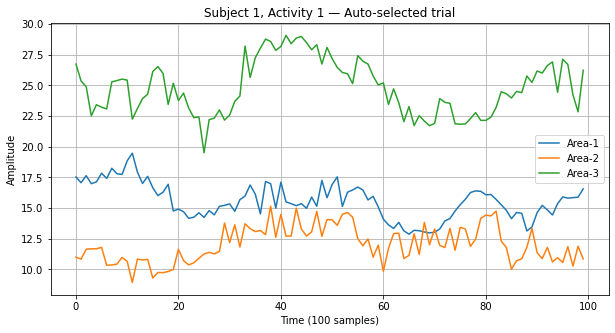

In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt

def plot_any_trial(subj=1, act=1):
    base = r"D:\PROJECT\Dataset\Trimmed Trials"
    areas = ["Area-1", "Area-2", "Area-3"]
    files = {}

    # Find first available CSV in each area
    for area in areas:
        folder = f"Trials_Subj-{subj}_{area}_Act-{act}"
        folder_path = os.path.join(base, folder)

        csv_files = [f for f in os.listdir(folder_path) if f.endswith(".csv")]

        if not csv_files:
            print(f"No CSV files in {folder_path}")
            return
        
        # pick the first csv file automatically
        files[area] = os.path.join(folder_path, csv_files[0])

    # ---------- Plotting -------------
    plt.figure(figsize=(10, 5))

    for area, path in files.items():
        df = pd.read_csv(path, header=None)
        signal = df.iloc[:, 0]    # trimmed file = 100x360 but single column amplitude
        plt.plot(signal, label=area)

    plt.title(f"Subject {subj}, Activity {act} — Auto-selected trial")
    plt.xlabel("Time (100 samples)")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.grid(True)
    plt.show()


# Run the function
plot_any_trial(subj=1, act=1)


## making trials of only one highest variance subcarrier

In [6]:
import os
import pandas as pd
import numpy as np

# ---------- Paths ----------
input_folder = r"D:\PROJECT\Dataset\DatasetCSV"
output_base = r"D:\PROJECT\Dataset\AllTrialsWithHighestVarianceSubcarrier"

# ---------- Parameters ----------
window_size = 100
min_length = 100      # minimum trial length
fallback_length = 100 # for auto extraction if no trials found


def extract_middle(df, length=100):
    """Return middle 'length' rows of dataframe."""
    if len(df) < length:
        return df
    start = (len(df) - length) // 2
    end = start + length
    return df.iloc[start:end]


# ---------- PROCESS ALL CSV FILES ----------
for file in os.listdir(input_folder):
    if file.endswith(".csv"):
        file_path = os.path.join(input_folder, file)
        print(f"\nProcessing: {file}")

        # Create output folder
        file_name = os.path.splitext(file)[0]
        output_folder = os.path.join(output_base, f"Trials_{file_name}")
        os.makedirs(output_folder, exist_ok=True)

        # Load CSV
        df = pd.read_csv(file_path)
        df = df.select_dtypes(include=[np.number])

        # Find highest variance subcarrier
        variances = df.var(axis=0)
        top1_index = variances.idxmax()
        signal = df[top1_index].values

        # Rolling std
        rolling_std = pd.Series(signal).rolling(window=window_size).std().fillna(0)

        # Fixed threshold (top 25%)
        threshold = rolling_std.quantile(0.75)
        high_var = rolling_std > threshold

        # Extract trials
        trials = []
        start = None

        for i, active in enumerate(high_var):
            if active and start is None:
                start = i
            elif not active and start is not None:
                end = i
                if end - start >= min_length:
                    trials.append((start, end))
                start = None

        # if last segment active
        if start is not None:
            end = len(signal)
            if end - start >= min_length:
                trials.append((start, end))

        print("Trials detected:", len(trials))

        # ---------- SAVE TRIALS ----------
        if len(trials) > 0:
            for i, (start, end) in enumerate(trials, start=1):
                trial_data = df.iloc[start:end]
                trial_filename = f"trial_subcarrier_{top1_index}_trial_{i}.csv"
                trial_path = os.path.join(output_folder, trial_filename)
                trial_data.to_csv(trial_path, index=False)

        else:
            # ---------- FALLBACK: ensure folder is NOT empty ----------
            print("No trials found → Saving fallback 100-row middle segment")

            fallback = extract_middle(df, fallback_length)
            fallback_filename = f"trial_subcarrier_{top1_index}_trial_1.csv"
            fallback_path = os.path.join(output_folder, fallback_filename)
            fallback.to_csv(fallback_path, index=False)

        print("Saved in:", output_folder)

print("\n All CSV files processed — no folder is empty now!")



Processing: Subj-10_Area-1_Act-1.csv
Trials detected: 3
Saved in: D:\PROJECT\Dataset\AllTrialsWithHighestVarianceSubcarrier\Trials_Subj-10_Area-1_Act-1

Processing: Subj-10_Area-1_Act-10.csv
Trials detected: 15
Saved in: D:\PROJECT\Dataset\AllTrialsWithHighestVarianceSubcarrier\Trials_Subj-10_Area-1_Act-10

Processing: Subj-10_Area-1_Act-2.csv
Trials detected: 17
Saved in: D:\PROJECT\Dataset\AllTrialsWithHighestVarianceSubcarrier\Trials_Subj-10_Area-1_Act-2

Processing: Subj-10_Area-1_Act-3.csv
Trials detected: 14
Saved in: D:\PROJECT\Dataset\AllTrialsWithHighestVarianceSubcarrier\Trials_Subj-10_Area-1_Act-3

Processing: Subj-10_Area-1_Act-4.csv
Trials detected: 8
Saved in: D:\PROJECT\Dataset\AllTrialsWithHighestVarianceSubcarrier\Trials_Subj-10_Area-1_Act-4

Processing: Subj-10_Area-1_Act-5.csv
Trials detected: 15
Saved in: D:\PROJECT\Dataset\AllTrialsWithHighestVarianceSubcarrier\Trials_Subj-10_Area-1_Act-5

Processing: Subj-10_Area-1_Act-6.csv
Trials detected: 13
Saved in: D:\PROJE

## trimming it to 100*360

In [7]:
import os
import pandas as pd

base_path = r"D:\PROJECT\Dataset\AllTrialsWithHighestVarianceSubcarrier"
output_path = r"D:\PROJECT\Dataset\TrimmedTrialsForHighestVarianceSubcarrier"  # new folder for trimmed data

target_rows = 100

os.makedirs(output_path, exist_ok=True)

def trim_center(df, target_rows):
    rows = len(df)
    if rows <= target_rows:
        return df  # skip trimming if already small
    
    start = (rows - target_rows) // 2
    end = start + target_rows
    return df.iloc[start:end].reset_index(drop=True)


# ---- Process all 300 folders ----
for folder in os.listdir(base_path):
    folder_path = os.path.join(base_path, folder)
    if not os.path.isdir(folder_path):
        continue

    print("Processing:", folder)

    output_folder = os.path.join(output_path, folder)
    os.makedirs(output_folder, exist_ok=True)

    for file in os.listdir(folder_path):
        if file.endswith(".csv"):
            fpath = os.path.join(folder_path, file)

            df = pd.read_csv(fpath, header=None)

            trimmed = trim_center(df, target_rows)

            # Save trimmed
            trimmed.to_csv(
                os.path.join(output_folder, file),
                index=False,
                header=False
            )

print("\n All files trimmed to 100 × 360 successfully!")


Processing: Trials_Subj-10_Area-1_Act-1
Processing: Trials_Subj-10_Area-1_Act-10
Processing: Trials_Subj-10_Area-1_Act-2
Processing: Trials_Subj-10_Area-1_Act-3
Processing: Trials_Subj-10_Area-1_Act-4
Processing: Trials_Subj-10_Area-1_Act-5
Processing: Trials_Subj-10_Area-1_Act-6
Processing: Trials_Subj-10_Area-1_Act-7
Processing: Trials_Subj-10_Area-1_Act-8
Processing: Trials_Subj-10_Area-1_Act-9
Processing: Trials_Subj-10_Area-2_Act-1
Processing: Trials_Subj-10_Area-2_Act-10
Processing: Trials_Subj-10_Area-2_Act-2
Processing: Trials_Subj-10_Area-2_Act-3
Processing: Trials_Subj-10_Area-2_Act-4
Processing: Trials_Subj-10_Area-2_Act-5
Processing: Trials_Subj-10_Area-2_Act-6
Processing: Trials_Subj-1_Area-1_Act-3
Processing: Trials_Subj-1_Area-1_Act-4
Processing: Trials_Subj-1_Area-1_Act-5
Processing: Trials_Subj-1_Area-1_Act-6
Processing: Trials_Subj-1_Area-1_Act-7
Processing: Trials_Subj-1_Area-1_Act-8
Processing: Trials_Subj-1_Area-1_Act-9
Processing: Trials_Subj-1_Area-2_Act-1
Proces

## plotting area wise for highest variance subcarrier

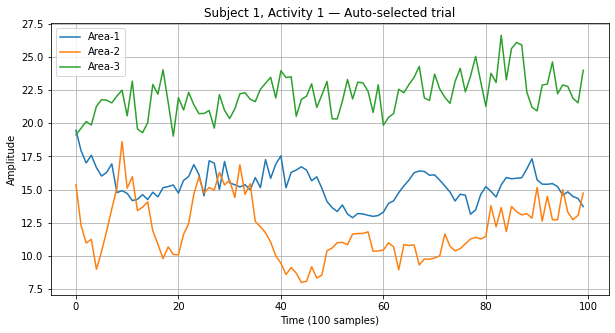

In [8]:
import os
import pandas as pd
import matplotlib.pyplot as plt

def plot_any_trial(subj=1, act=1):
    base = r"D:\PROJECT\Dataset\TrimmedTrialsForHighestVarianceSubcarrier"
    areas = ["Area-1", "Area-2", "Area-3"]
    files = {}

    # Find first available CSV in each area
    for area in areas:
        folder = f"Trials_Subj-{subj}_{area}_Act-{act}"
        folder_path = os.path.join(base, folder)

        csv_files = [f for f in os.listdir(folder_path) if f.endswith(".csv")]

        if not csv_files:
            print(f"No CSV files in {folder_path}")
            return
        
        # pick the first csv file automatically
        files[area] = os.path.join(folder_path, csv_files[0])

    # ---------- Plotting -------------
    plt.figure(figsize=(10, 5))

    for area, path in files.items():
        df = pd.read_csv(path, header=None)
        signal = df.iloc[:, 0]    # trimmed file = 100x360 but single column amplitude
        plt.plot(signal, label=area)

    plt.title(f"Subject {subj}, Activity {act} — Auto-selected trial")
    plt.xlabel("Time (100 samples)")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.grid(True)
    plt.show()


# Run the function
plot_any_trial(subj=1, act=1)

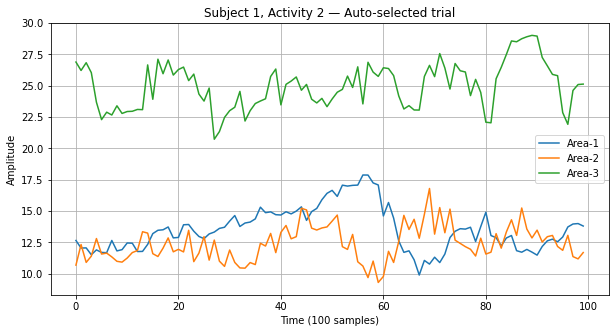

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

def plot_any_trial(subj=1, act=1):
    base = r"D:\PROJECT\Dataset\TrimmedTrialsForHighestVarianceSubcarrier"
    areas = ["Area-1", "Area-2", "Area-3"]
    files = {}

    # Find first available CSV in each area
    for area in areas:
        folder = f"Trials_Subj-{subj}_{area}_Act-{act}"
        folder_path = os.path.join(base, folder)

        csv_files = [f for f in os.listdir(folder_path) if f.endswith(".csv")]

        if not csv_files:
            print(f"No CSV files in {folder_path}")
            return
        
        # pick the first csv file automatically
        files[area] = os.path.join(folder_path, csv_files[0])

    # ---------- Plotting -------------
    plt.figure(figsize=(10, 5))

    for area, path in files.items():
        df = pd.read_csv(path, header=None)
        signal = df.iloc[:, 0]    # trimmed file = 100x360 but single column amplitude
        plt.plot(signal, label=area)

    plt.title(f"Subject {subj}, Activity {act} — Auto-selected trial")
    plt.xlabel("Time (100 samples)")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.grid(True)
    plt.show()


# Run the function
plot_any_trial(subj=1, act=2)

## all graphs

Subjects found: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Activities found: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Saved: D:\PROJECT\Dataset\Graphs\S1_A1.png


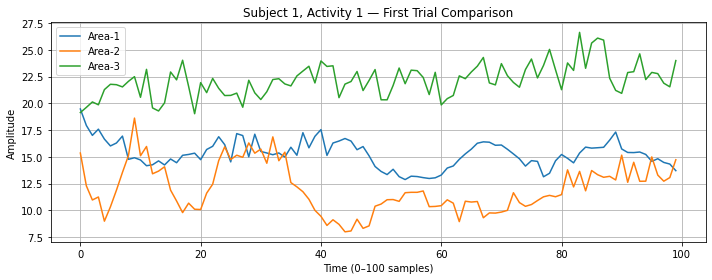

Saved: D:\PROJECT\Dataset\Graphs\S1_A2.png


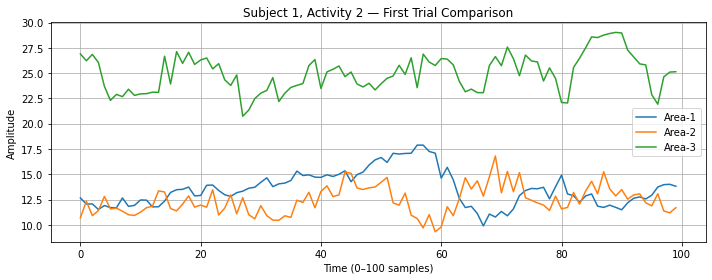

Saved: D:\PROJECT\Dataset\Graphs\S1_A3.png


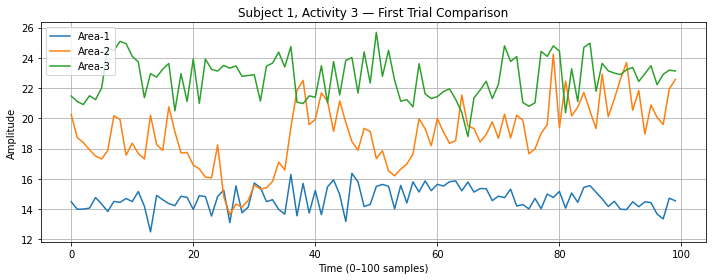

Saved: D:\PROJECT\Dataset\Graphs\S1_A4.png


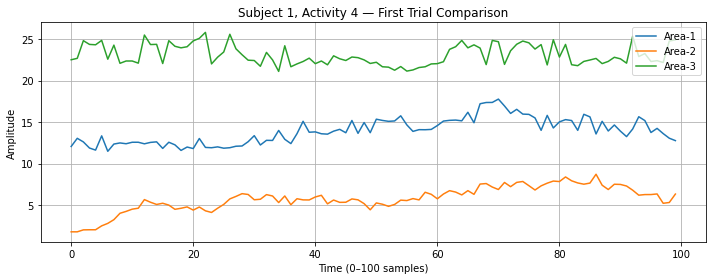

Saved: D:\PROJECT\Dataset\Graphs\S1_A5.png


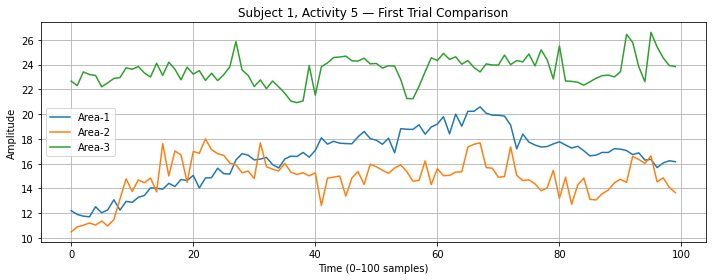

Saved: D:\PROJECT\Dataset\Graphs\S1_A6.png


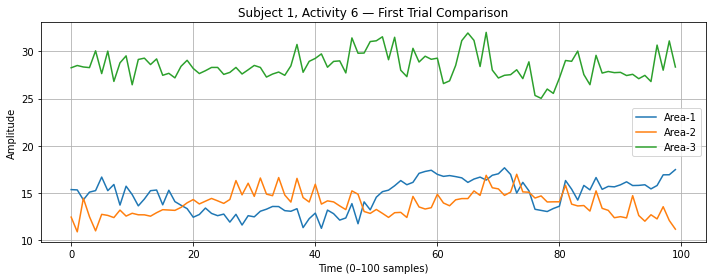

Saved: D:\PROJECT\Dataset\Graphs\S1_A7.png


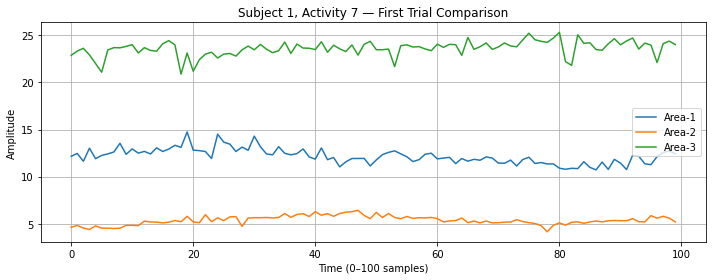

Saved: D:\PROJECT\Dataset\Graphs\S1_A8.png


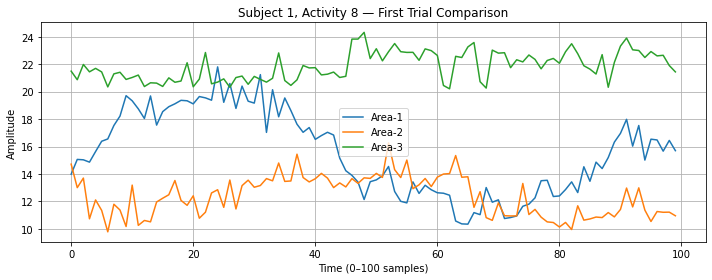

Saved: D:\PROJECT\Dataset\Graphs\S1_A9.png


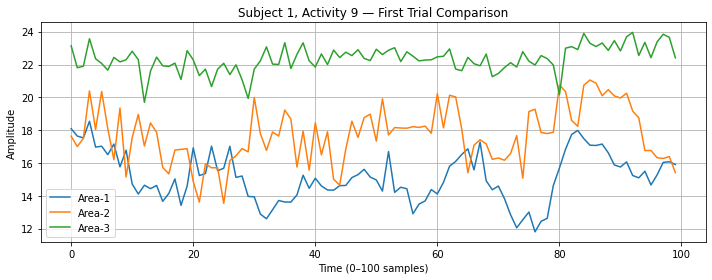

Saved: D:\PROJECT\Dataset\Graphs\S1_A10.png


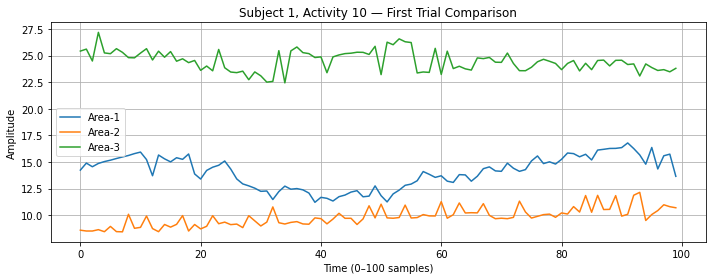

Saved: D:\PROJECT\Dataset\Graphs\S2_A1.png


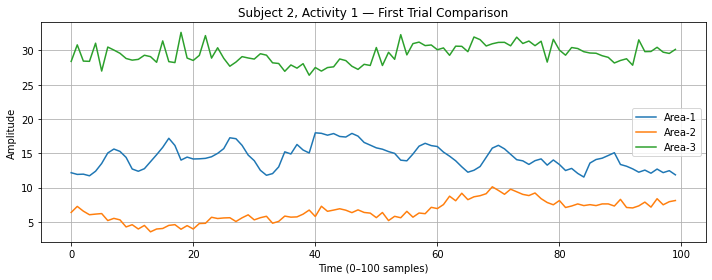

Saved: D:\PROJECT\Dataset\Graphs\S2_A2.png


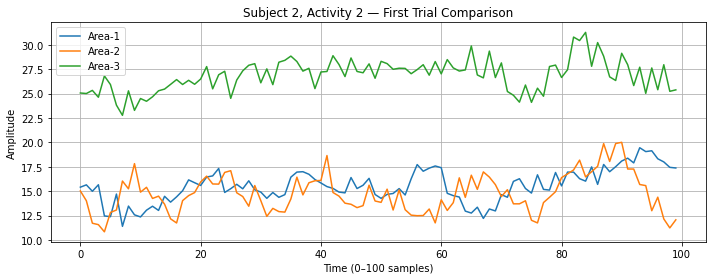

Saved: D:\PROJECT\Dataset\Graphs\S2_A3.png


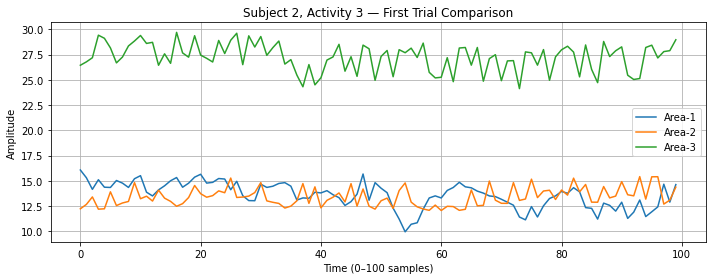

Saved: D:\PROJECT\Dataset\Graphs\S2_A4.png


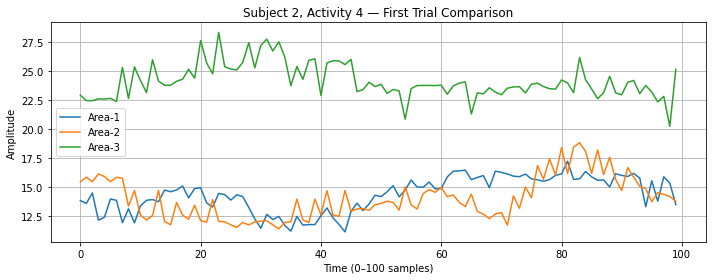

Saved: D:\PROJECT\Dataset\Graphs\S2_A5.png


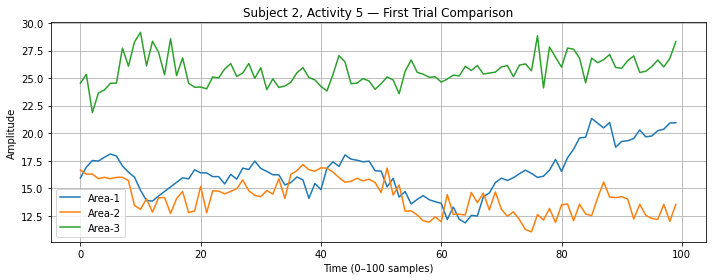

Saved: D:\PROJECT\Dataset\Graphs\S2_A6.png


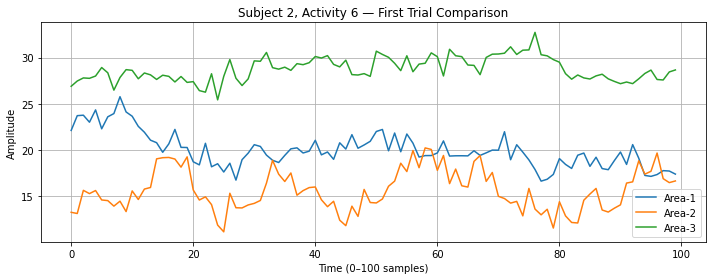

Saved: D:\PROJECT\Dataset\Graphs\S2_A7.png


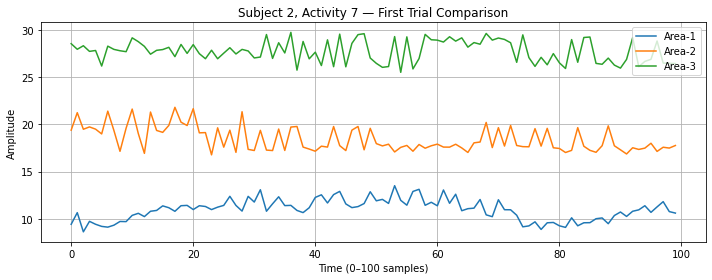

Saved: D:\PROJECT\Dataset\Graphs\S2_A8.png


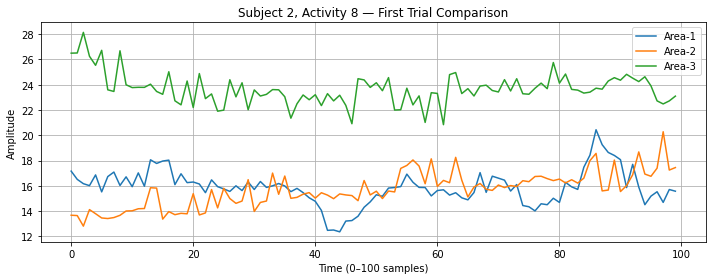

Saved: D:\PROJECT\Dataset\Graphs\S2_A9.png


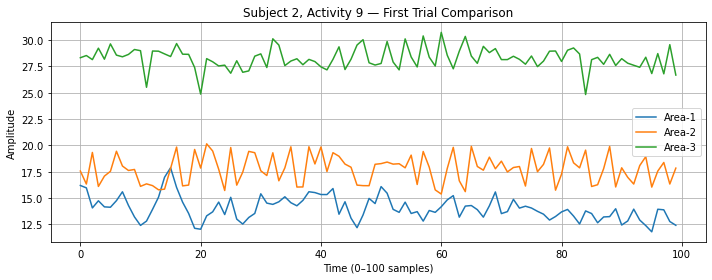

Saved: D:\PROJECT\Dataset\Graphs\S2_A10.png


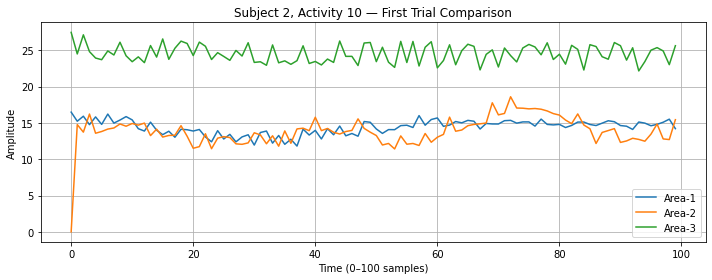

Saved: D:\PROJECT\Dataset\Graphs\S3_A1.png


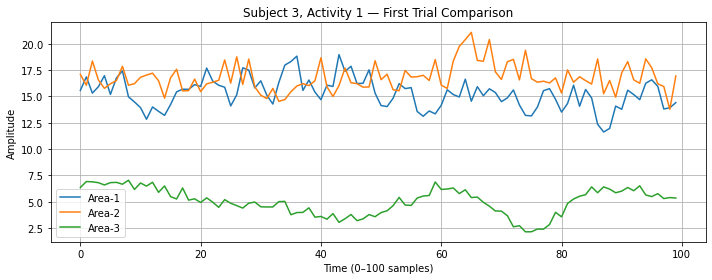

Saved: D:\PROJECT\Dataset\Graphs\S3_A2.png


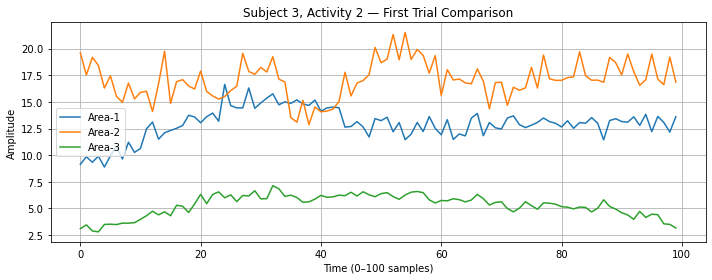

Saved: D:\PROJECT\Dataset\Graphs\S3_A3.png


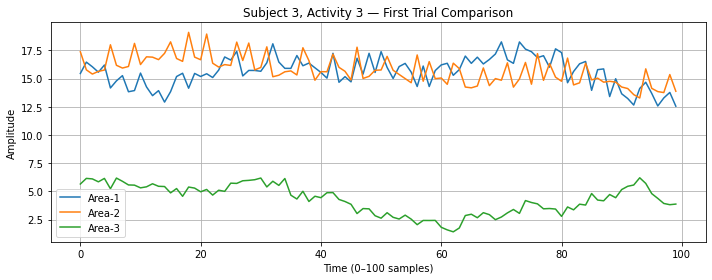

Saved: D:\PROJECT\Dataset\Graphs\S3_A4.png


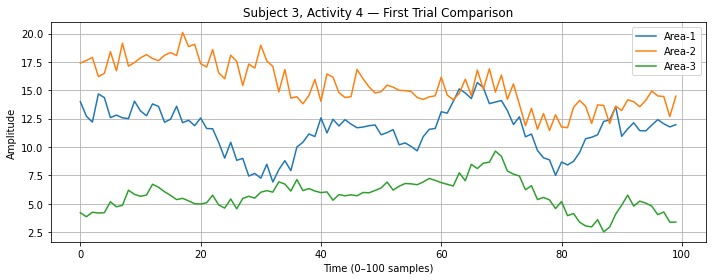

Saved: D:\PROJECT\Dataset\Graphs\S3_A5.png


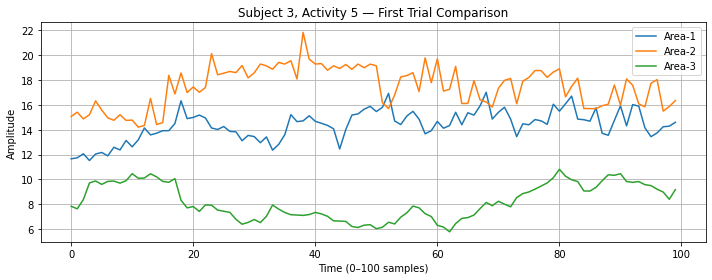

Saved: D:\PROJECT\Dataset\Graphs\S3_A6.png


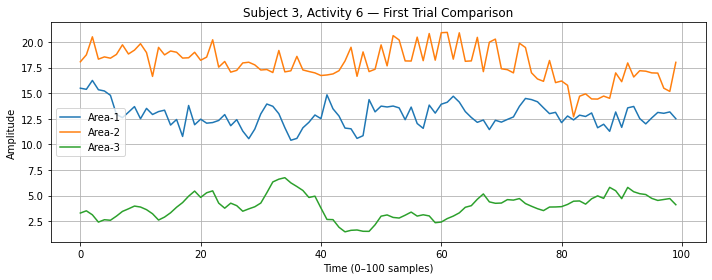

Saved: D:\PROJECT\Dataset\Graphs\S3_A7.png


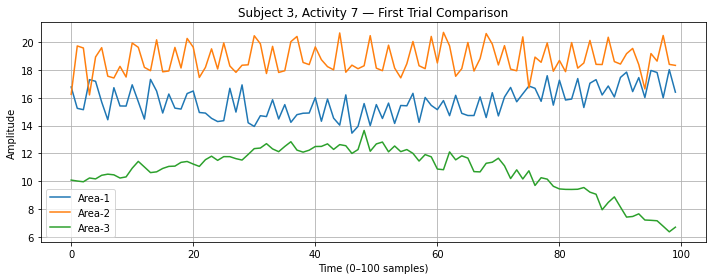

Saved: D:\PROJECT\Dataset\Graphs\S3_A8.png


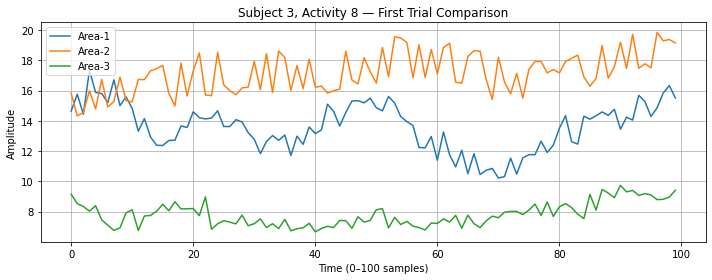

Saved: D:\PROJECT\Dataset\Graphs\S3_A9.png


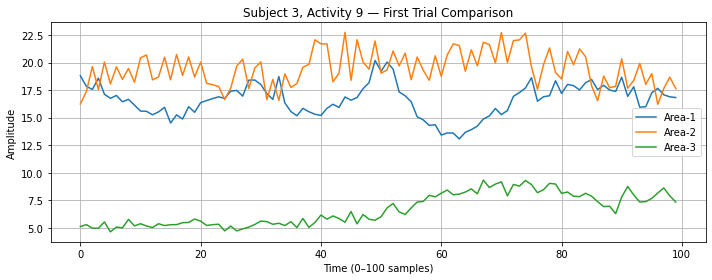

Saved: D:\PROJECT\Dataset\Graphs\S3_A10.png


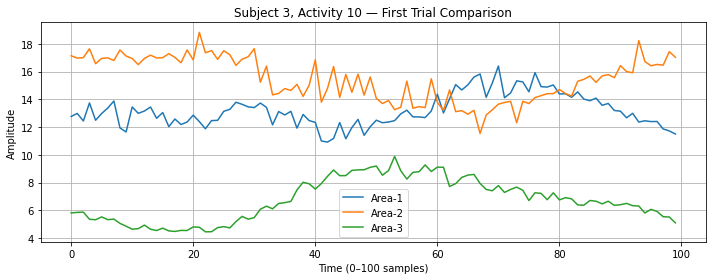

Saved: D:\PROJECT\Dataset\Graphs\S4_A1.png


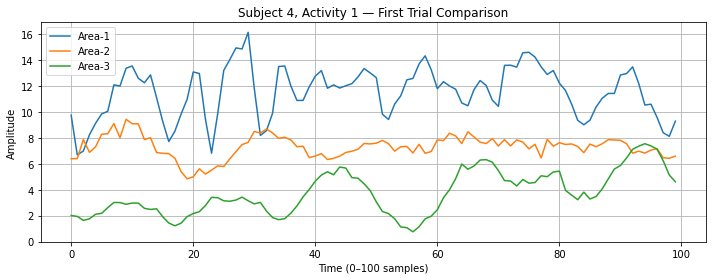

Saved: D:\PROJECT\Dataset\Graphs\S4_A2.png


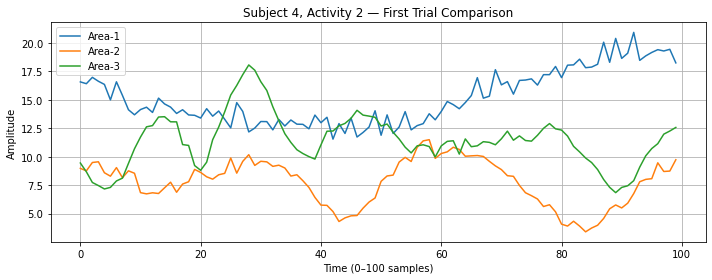

Saved: D:\PROJECT\Dataset\Graphs\S4_A3.png


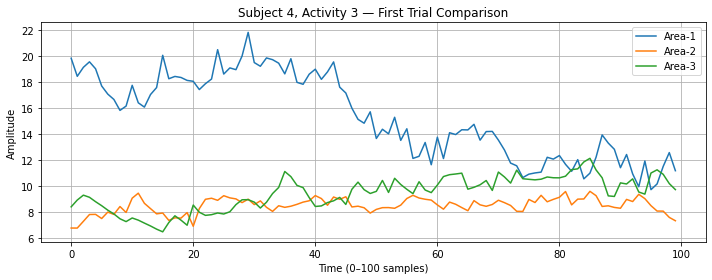

Saved: D:\PROJECT\Dataset\Graphs\S4_A4.png


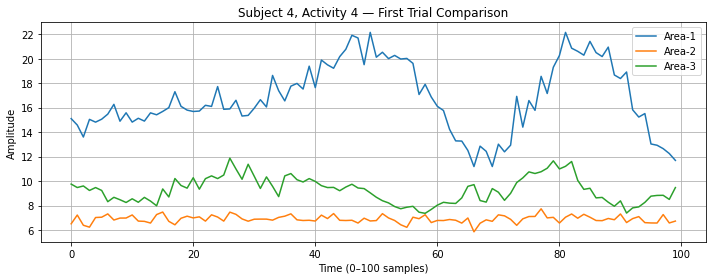

Saved: D:\PROJECT\Dataset\Graphs\S4_A5.png


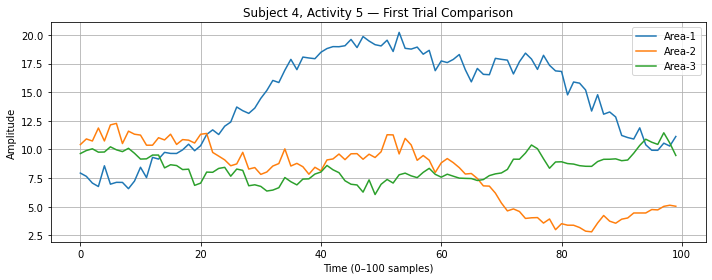

Saved: D:\PROJECT\Dataset\Graphs\S4_A6.png


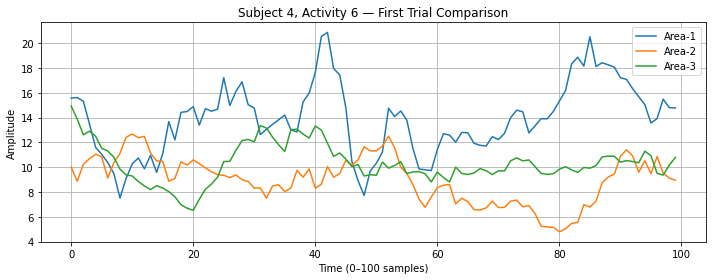

Saved: D:\PROJECT\Dataset\Graphs\S4_A7.png


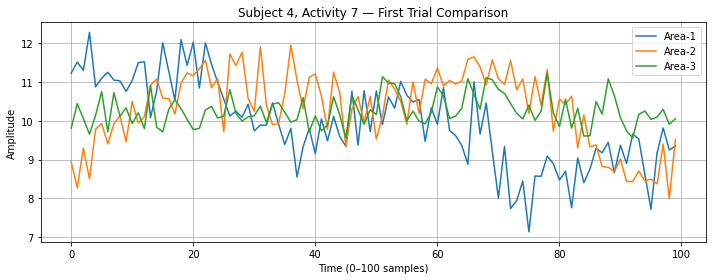

Saved: D:\PROJECT\Dataset\Graphs\S4_A8.png


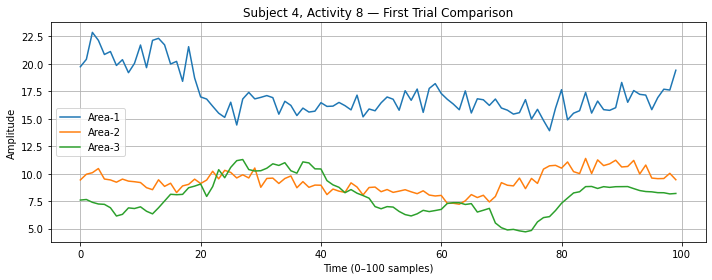

Saved: D:\PROJECT\Dataset\Graphs\S4_A9.png


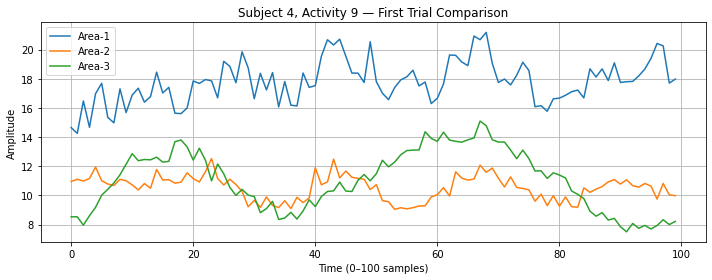

Saved: D:\PROJECT\Dataset\Graphs\S4_A10.png


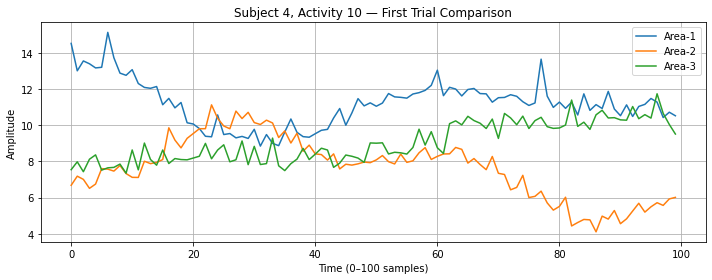

Saved: D:\PROJECT\Dataset\Graphs\S5_A1.png


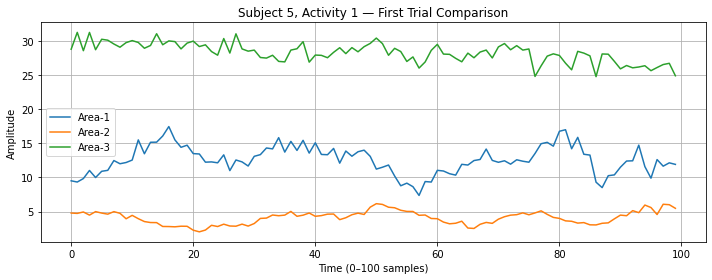

Saved: D:\PROJECT\Dataset\Graphs\S5_A2.png


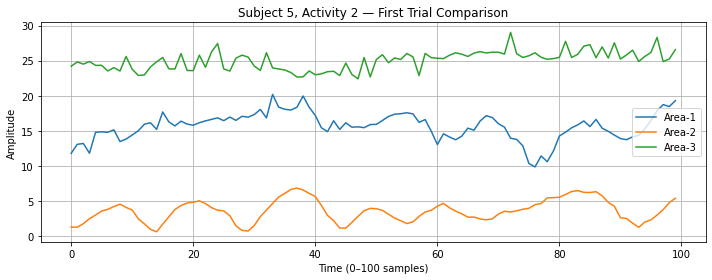

Saved: D:\PROJECT\Dataset\Graphs\S5_A3.png


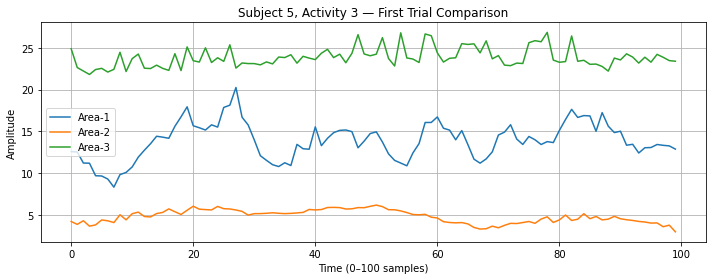

Saved: D:\PROJECT\Dataset\Graphs\S5_A4.png


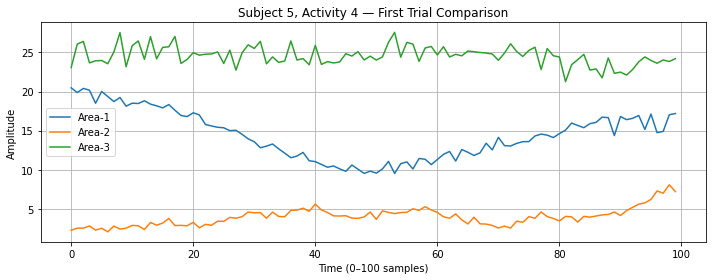

Saved: D:\PROJECT\Dataset\Graphs\S5_A5.png


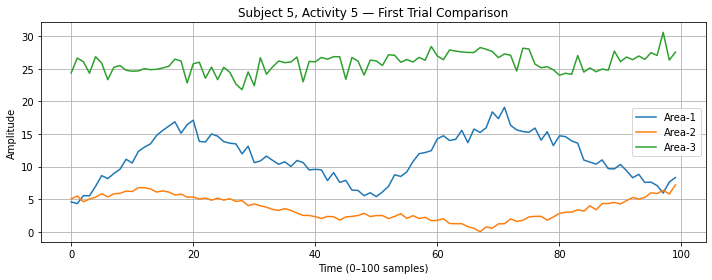

Saved: D:\PROJECT\Dataset\Graphs\S5_A6.png


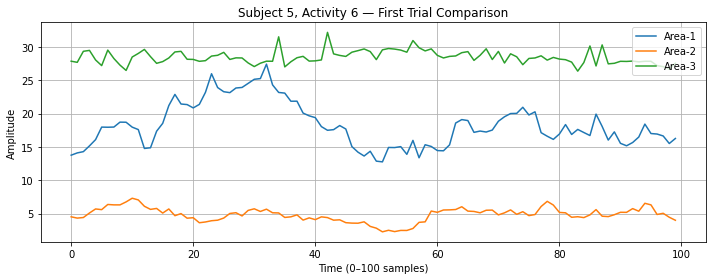

Saved: D:\PROJECT\Dataset\Graphs\S5_A7.png


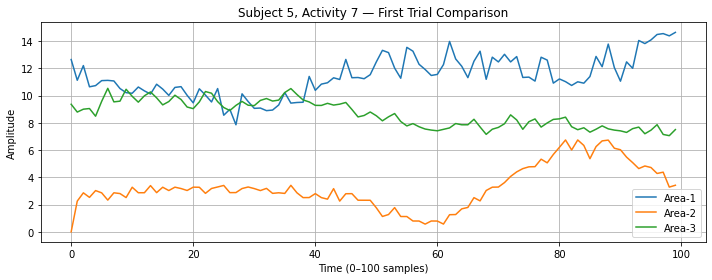

Saved: D:\PROJECT\Dataset\Graphs\S5_A8.png


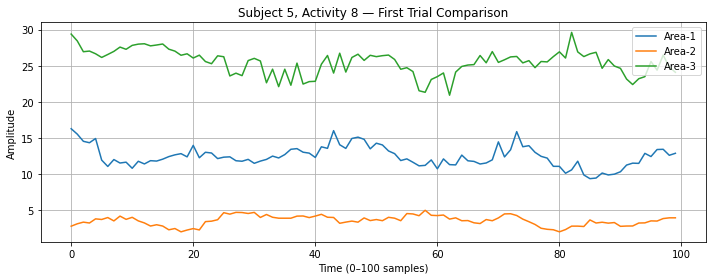

Saved: D:\PROJECT\Dataset\Graphs\S5_A9.png


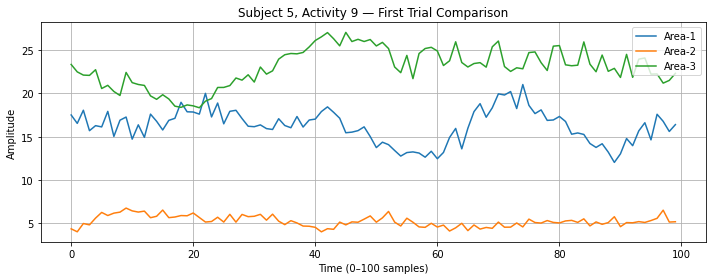

Saved: D:\PROJECT\Dataset\Graphs\S5_A10.png


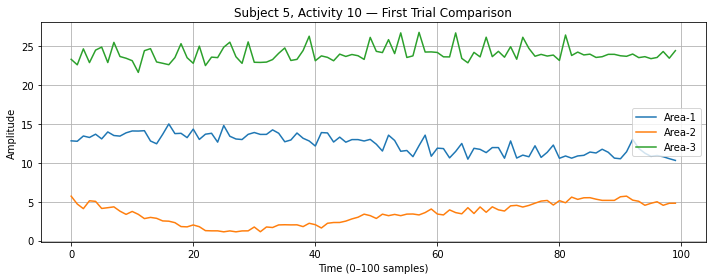

Saved: D:\PROJECT\Dataset\Graphs\S6_A1.png


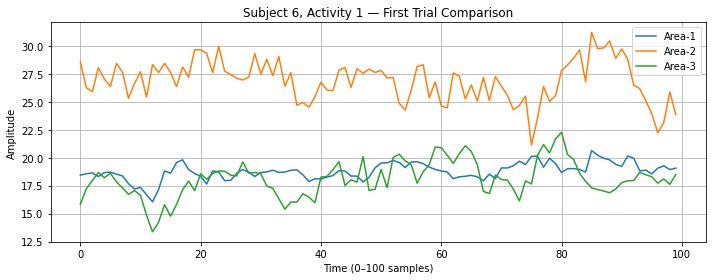

Saved: D:\PROJECT\Dataset\Graphs\S6_A2.png


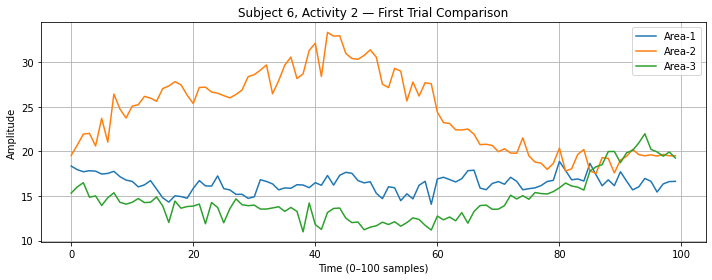

Saved: D:\PROJECT\Dataset\Graphs\S6_A3.png


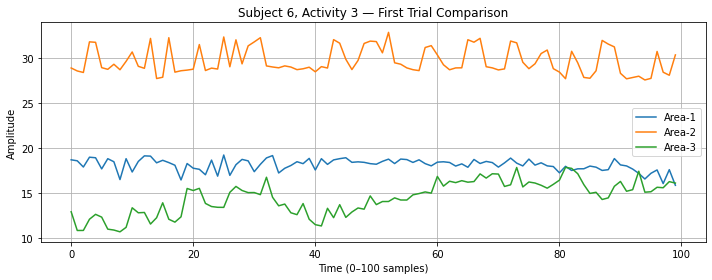

Saved: D:\PROJECT\Dataset\Graphs\S6_A4.png


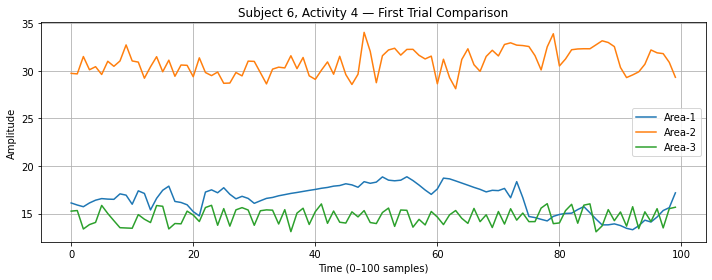

Saved: D:\PROJECT\Dataset\Graphs\S6_A5.png


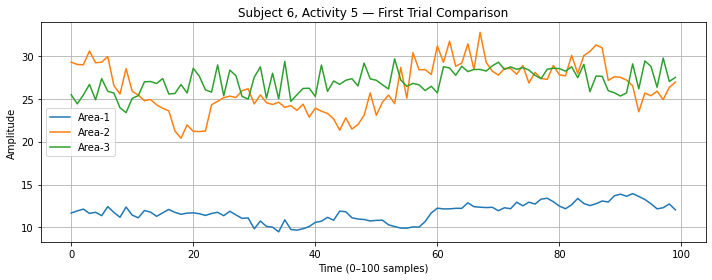

Saved: D:\PROJECT\Dataset\Graphs\S6_A6.png


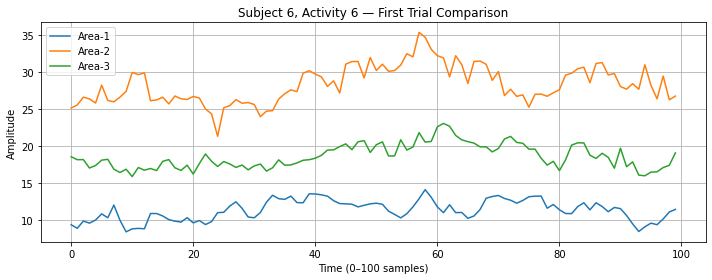

Saved: D:\PROJECT\Dataset\Graphs\S6_A7.png


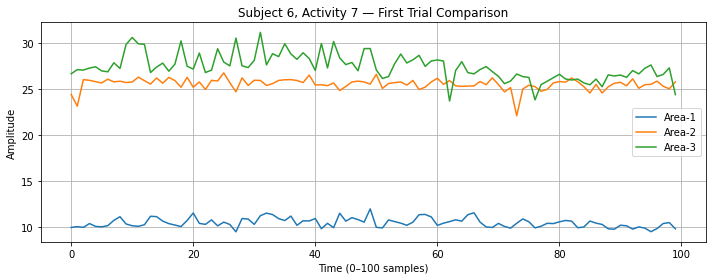

Saved: D:\PROJECT\Dataset\Graphs\S6_A8.png


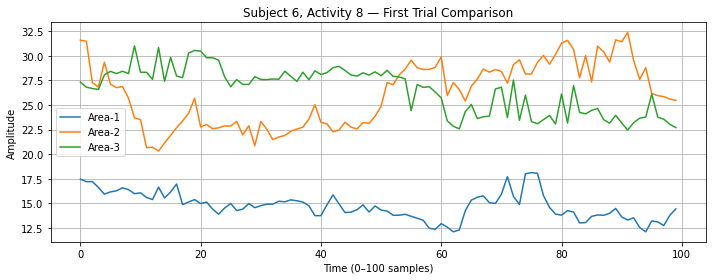

Saved: D:\PROJECT\Dataset\Graphs\S6_A9.png


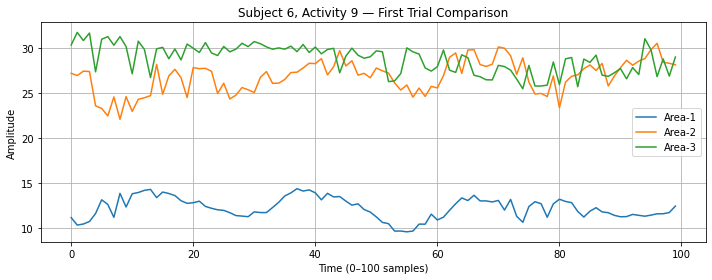

Saved: D:\PROJECT\Dataset\Graphs\S6_A10.png


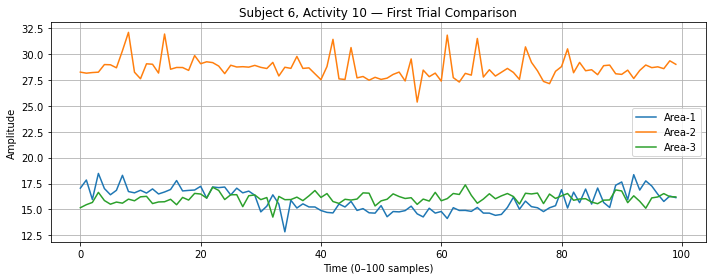

Saved: D:\PROJECT\Dataset\Graphs\S7_A1.png


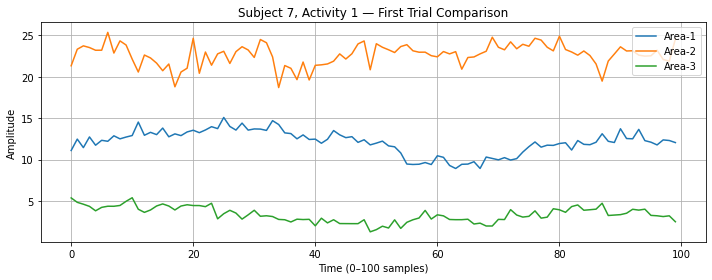

Saved: D:\PROJECT\Dataset\Graphs\S7_A2.png


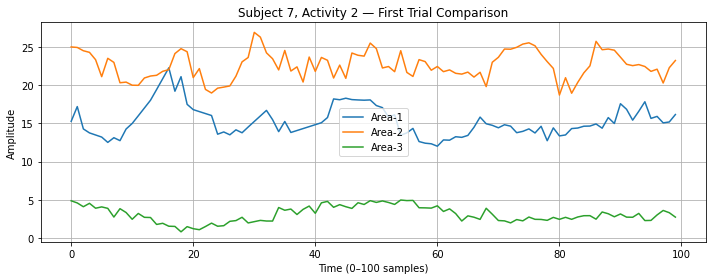

Saved: D:\PROJECT\Dataset\Graphs\S7_A3.png


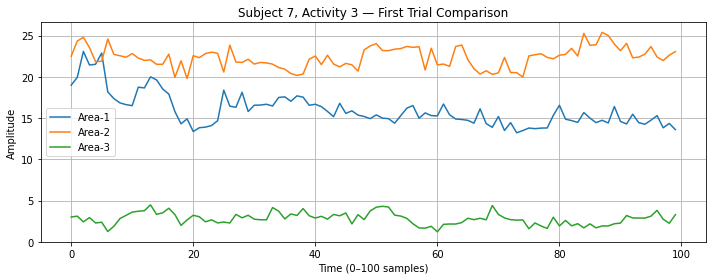

Saved: D:\PROJECT\Dataset\Graphs\S7_A4.png


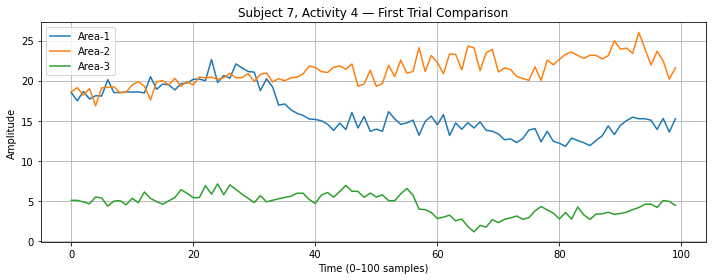

Saved: D:\PROJECT\Dataset\Graphs\S7_A5.png


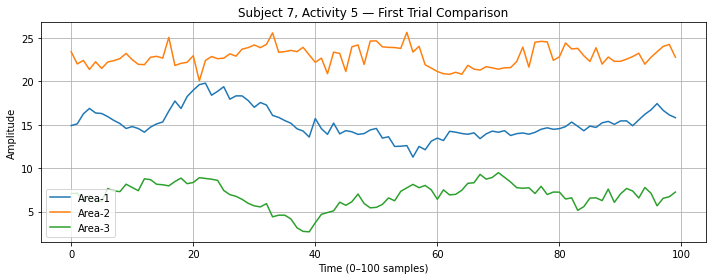

Saved: D:\PROJECT\Dataset\Graphs\S7_A6.png


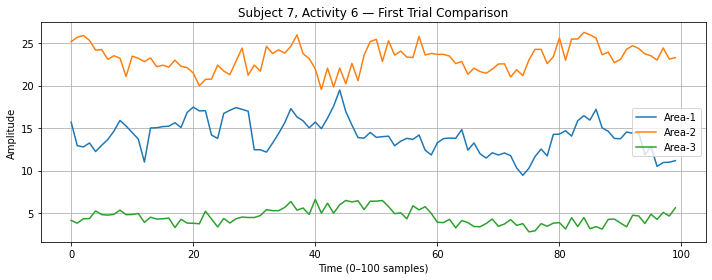

Saved: D:\PROJECT\Dataset\Graphs\S7_A7.png


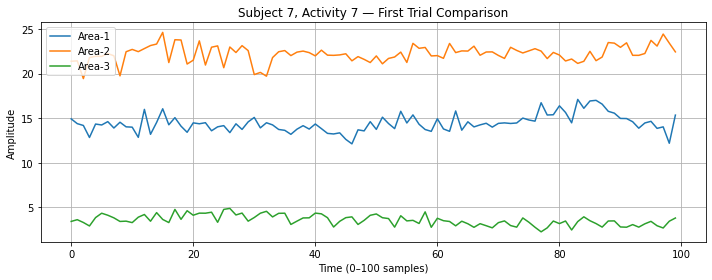

Saved: D:\PROJECT\Dataset\Graphs\S7_A8.png


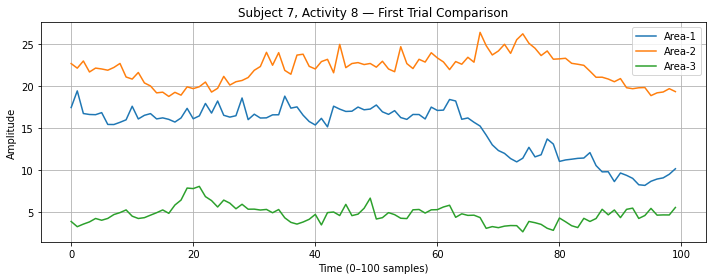

Saved: D:\PROJECT\Dataset\Graphs\S7_A9.png


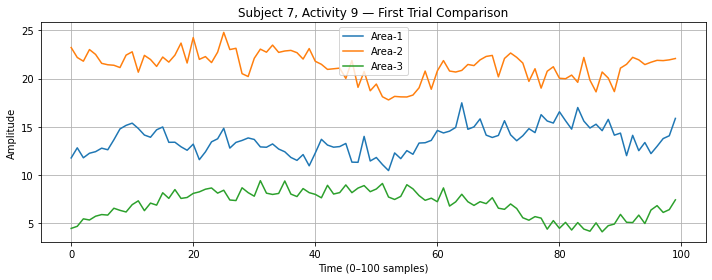

Saved: D:\PROJECT\Dataset\Graphs\S7_A10.png


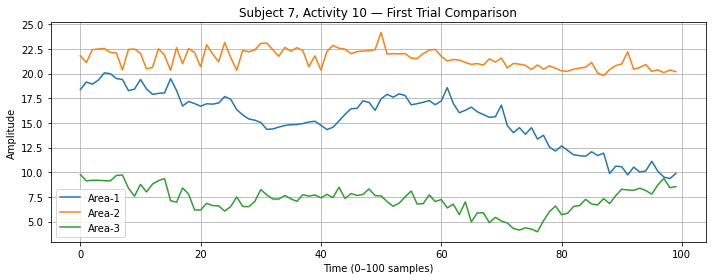

Saved: D:\PROJECT\Dataset\Graphs\S8_A1.png


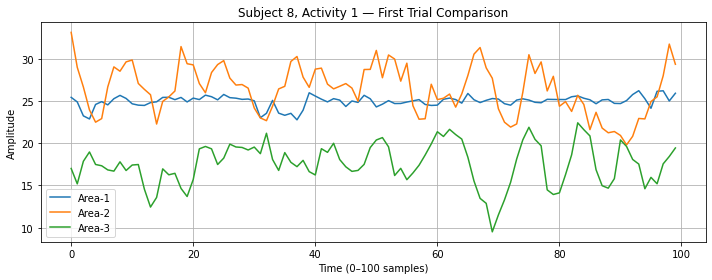

Saved: D:\PROJECT\Dataset\Graphs\S8_A2.png


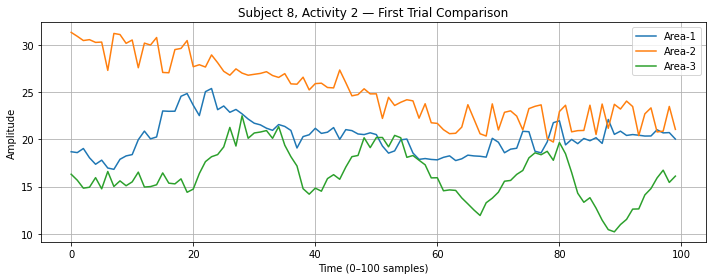

Saved: D:\PROJECT\Dataset\Graphs\S8_A3.png


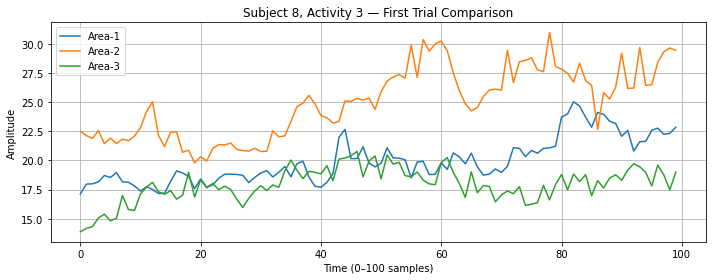

Saved: D:\PROJECT\Dataset\Graphs\S8_A4.png


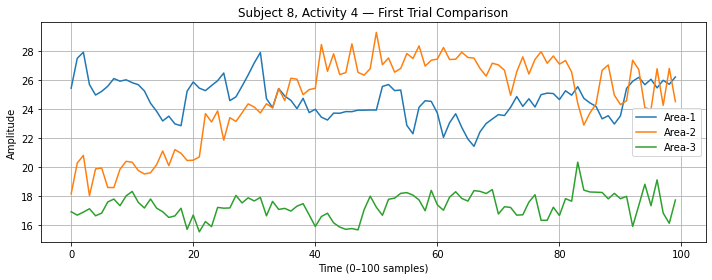

Saved: D:\PROJECT\Dataset\Graphs\S8_A5.png


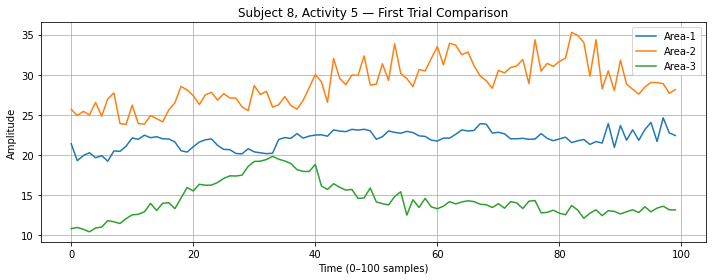

Saved: D:\PROJECT\Dataset\Graphs\S8_A6.png


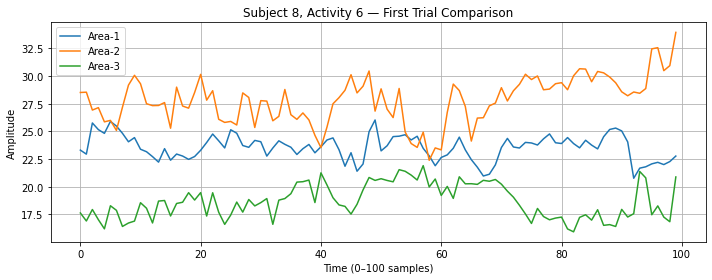

Saved: D:\PROJECT\Dataset\Graphs\S8_A7.png


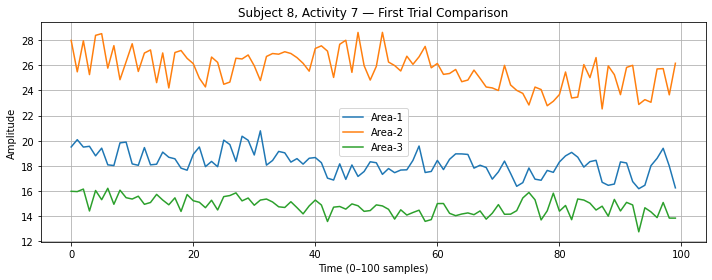

Saved: D:\PROJECT\Dataset\Graphs\S8_A8.png


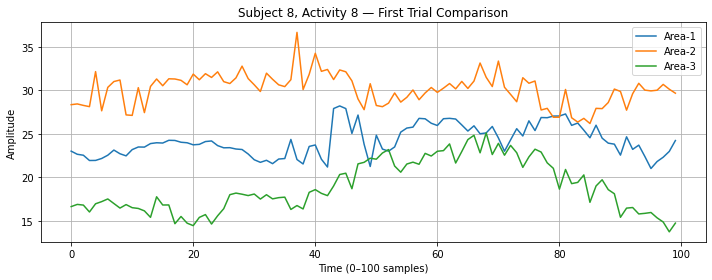

Saved: D:\PROJECT\Dataset\Graphs\S8_A9.png


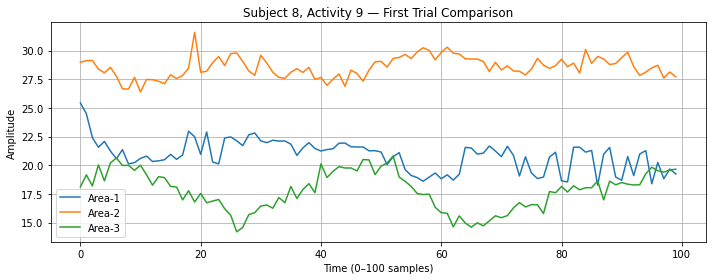

Saved: D:\PROJECT\Dataset\Graphs\S8_A10.png


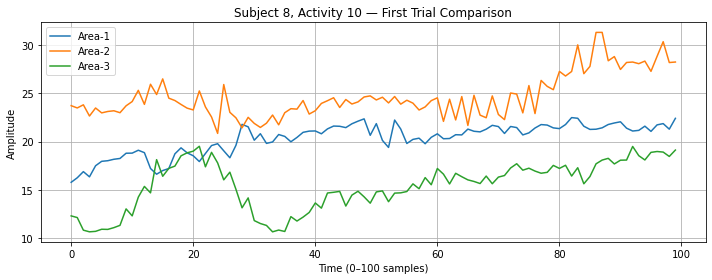

Saved: D:\PROJECT\Dataset\Graphs\S9_A1.png


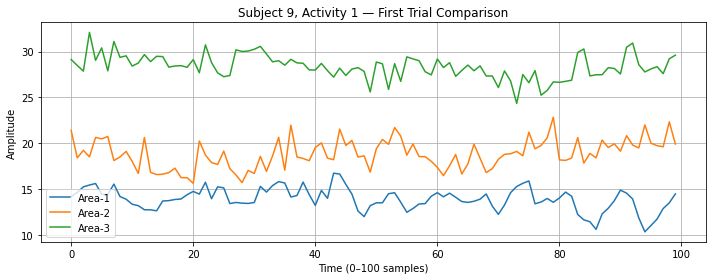

Saved: D:\PROJECT\Dataset\Graphs\S9_A2.png


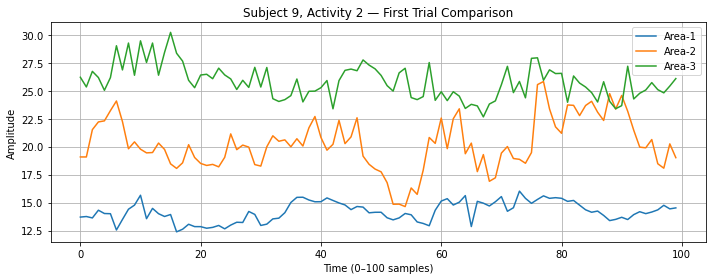

Saved: D:\PROJECT\Dataset\Graphs\S9_A3.png


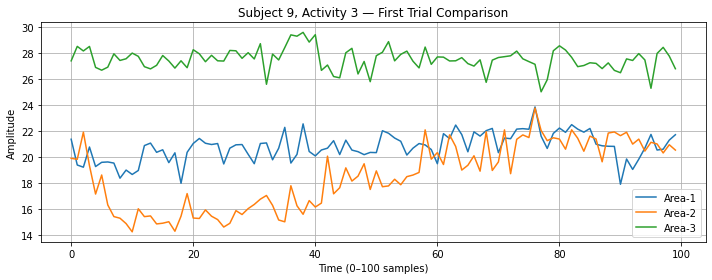

Saved: D:\PROJECT\Dataset\Graphs\S9_A4.png


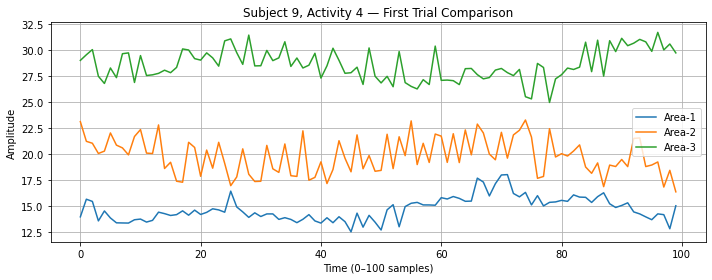

Saved: D:\PROJECT\Dataset\Graphs\S9_A5.png


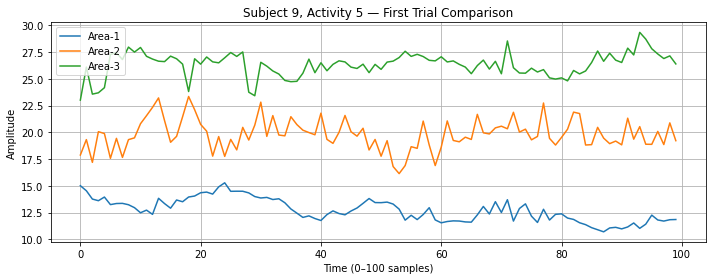

Saved: D:\PROJECT\Dataset\Graphs\S9_A6.png


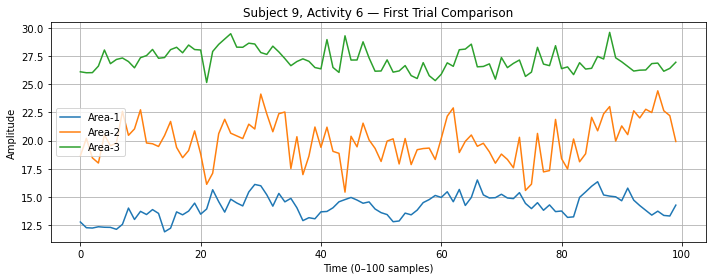

Saved: D:\PROJECT\Dataset\Graphs\S9_A7.png


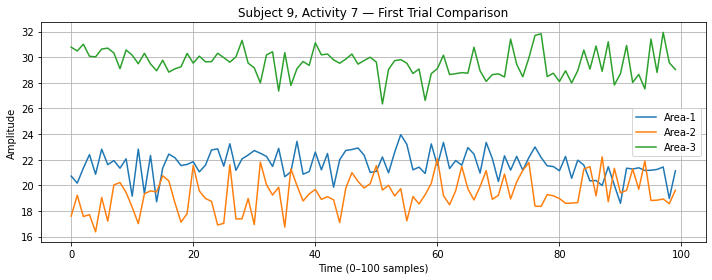

Saved: D:\PROJECT\Dataset\Graphs\S9_A8.png


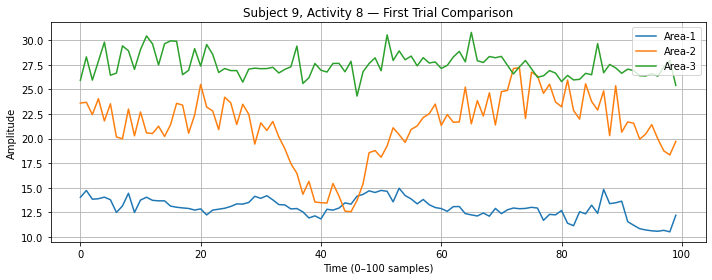

Saved: D:\PROJECT\Dataset\Graphs\S9_A9.png


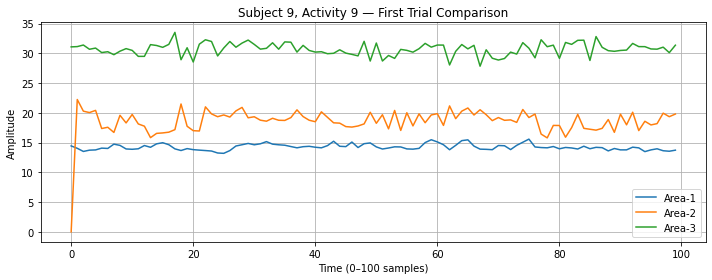

Saved: D:\PROJECT\Dataset\Graphs\S9_A10.png


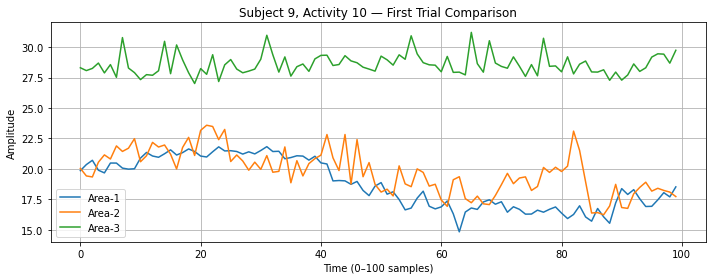

Saved: D:\PROJECT\Dataset\Graphs\S10_A1.png


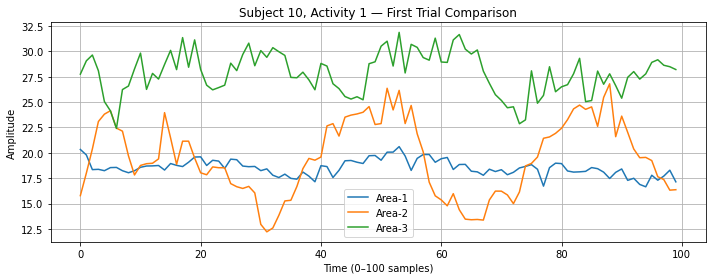

Saved: D:\PROJECT\Dataset\Graphs\S10_A2.png


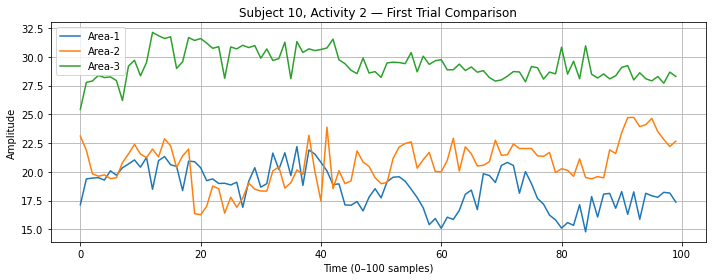

Saved: D:\PROJECT\Dataset\Graphs\S10_A3.png


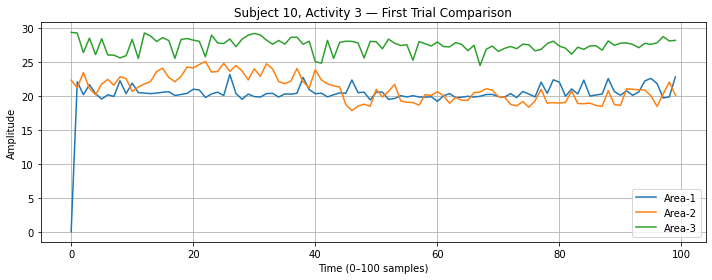

Saved: D:\PROJECT\Dataset\Graphs\S10_A4.png


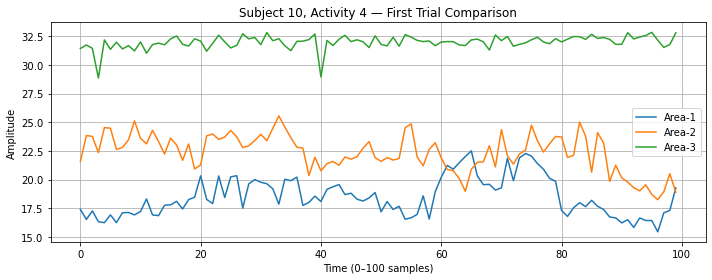

Saved: D:\PROJECT\Dataset\Graphs\S10_A5.png


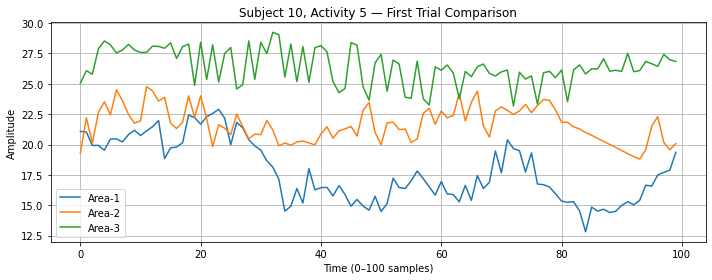

Saved: D:\PROJECT\Dataset\Graphs\S10_A6.png


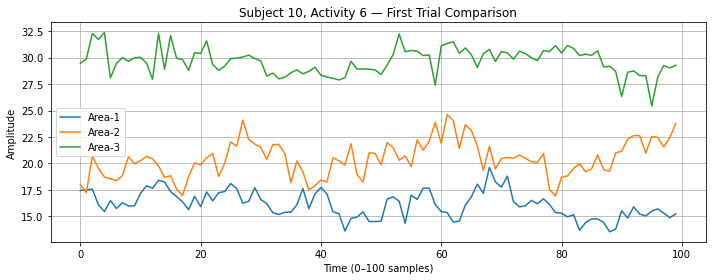

Saved: D:\PROJECT\Dataset\Graphs\S10_A7.png


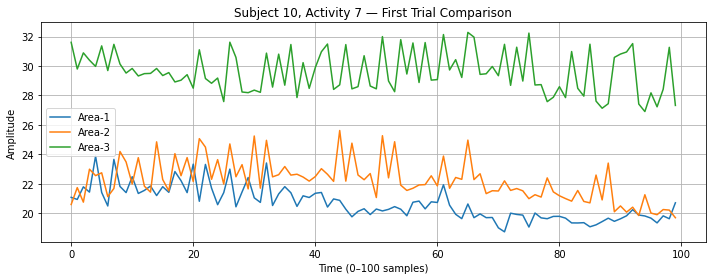

Saved: D:\PROJECT\Dataset\Graphs\S10_A8.png


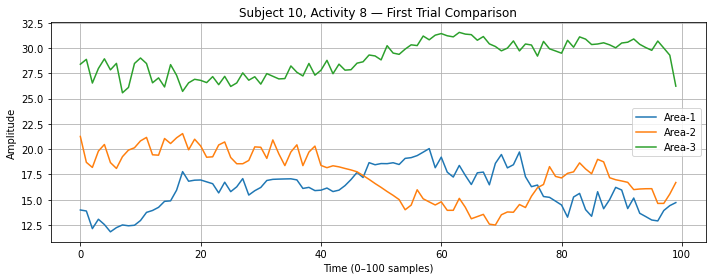

Saved: D:\PROJECT\Dataset\Graphs\S10_A9.png


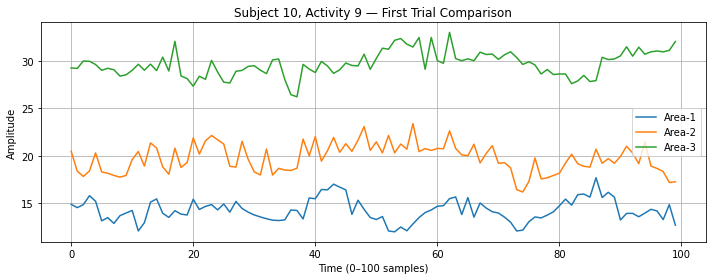

Saved: D:\PROJECT\Dataset\Graphs\S10_A10.png


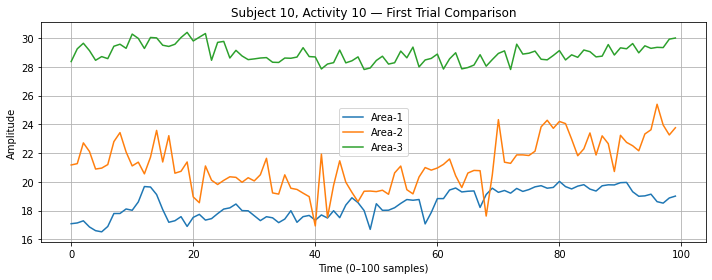

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

base = r"D:\PROJECT\Dataset\TrimmedTrialsForHighestVarianceSubcarrier"
save_dir = r"D:\PROJECT\Dataset\Graphs"

os.makedirs(save_dir, exist_ok=True)   # create folder to save graphs


def plot_and_save_all():
    # List all folders
    folders = [f for f in os.listdir(base) if f.startswith("Trials_Subj")]

    # Detect unique subjects & activities
    subjects = set()
    activities = set()

    for folder in folders:
        parts = folder.split("_")
        subj = int(parts[1].split("-")[1])
        act = int(parts[3].split("-")[1])
        subjects.add(subj)
        activities.add(act)

    subjects = sorted(list(subjects))
    activities = sorted(list(activities))

    print("Subjects found:", subjects)
    print("Activities found:", activities)

    # ----------- LOOP THROUGH ALL SUBJECTS & ACTIVITIES ------------
    for subj in subjects:
        for act in activities:
            areas = ["Area-1", "Area-2", "Area-3"]
            files = {}

            # find first csv per area
            for area in areas:
                folder_name = f"Trials_Subj-{subj}_{area}_Act-{act}"
                folder_path = os.path.join(base, folder_name)

                if not os.path.exists(folder_path):
                    print(f"Missing: {folder_path}")
                    continue

                csv_files = [f for f in os.listdir(folder_path) if f.endswith(".csv")]

                if not csv_files:
                    print(f"No CSVs inside: {folder_path}")
                    continue

                files[area] = os.path.join(folder_path, csv_files[0])

            if len(files) != 3:
                print(f"Skipping S{subj} A{act} — not all areas available.")
                continue

            # --------------- PLOT ----------------
            plt.figure(figsize=(10, 4))

            for area, filepath in files.items():
                df = pd.read_csv(filepath, header=None)
                signal = df.iloc[:, 0]  # 100 rows trimmed
                plt.plot(signal, label=area)

            title = f"Subject {subj}, Activity {act} — First Trial Comparison"
            plt.title(title)
            plt.xlabel("Time (0–100 samples)")
            plt.ylabel("Amplitude")
            plt.legend()
            plt.grid(True)
            plt.tight_layout()

            # ---------- SAVE GRAPH ----------
            save_path = os.path.join(save_dir, f"S{subj}_A{act}.png")
            plt.savefig(save_path, dpi=300)

            print(f"Saved: {save_path}")

            # Show graph
            plt.show()


# ---------- RUN ----------
plot_and_save_all()


## separate areas for only activity (merging folders to reduce no. of folders) like we did earlier for separate activities things

In [1]:
import os
import shutil

# Original source folders
source_root = r"D:/PROJECT/Dataset/Separate Area for one activity"

# NEW output root where you want flattened folders
output_root = r"D:/PROJECT/Dataset/Separate Area for one activity (merged)"

os.makedirs(output_root, exist_ok=True)

for activity in os.listdir(source_root):
    activity_path = os.path.join(source_root, activity)
    if not os.path.isdir(activity_path):
        continue

    print(f"Processing {activity} ...")

    # Create output folder for this activity
    activity_output = os.path.join(output_root, activity)
    os.makedirs(activity_output, exist_ok=True)

    # Loop inside Activity folder
    for subfolder in os.listdir(activity_path):
        subfolder_path = os.path.join(activity_path, subfolder)

        # We only process folders like: Trials_Subj-1_Area-1_Act-1
        if os.path.isdir(subfolder_path) and subfolder.startswith("Trials_"):

            # Extract Subj and Area from folder name
            parts = subfolder.split("_")
            subj = parts[1]     # Subj-1
            area = parts[2]     # Area-1

            for file in os.listdir(subfolder_path):
                if file.endswith(".csv"):

                    src = os.path.join(subfolder_path, file)

                    # NEW filename → just add Subj and Area
                    new_filename = f"{subj}_{area}_{file}"

                    dest = os.path.join(activity_output, new_filename)

                    # Copy file to new structure
                    shutil.copy(src, dest)

print("\n Done! All CSVs flattened into new activity folders.")

Processing Area_1 ...
Processing Area_2 ...
Processing Area_3 ...

 Done! All CSVs flattened into new activity folders.


## making uniform (100*360)

In [2]:
import pandas as pd
import os

root = r"D:/PROJECT/Dataset/Separate Area for one activity (merged)"

for area in ["Area_1", "Area_2", "Area_3"]:
    area_path = os.path.join(root, area)

    print(f"\nTrimming merged CSVs in {area}...")

    for file in os.listdir(area_path):
        if file.endswith(".csv"):
            path = os.path.join(area_path, file)

            df = pd.read_csv(path, header=None)
            total_rows = df.shape[0]

            # Middle 100 rows
            if total_rows >= 100:
                start = (total_rows - 100) // 2
                end = start + 100
                df = df.iloc[start:end, :360]      # Keep 100×360
            else:
                print(f" Skipped {file}: less than 100 rows")
                continue

            df.to_csv(path, index=False, header=False)

print("\nAll merged CSVs trimmed to middle 100 × 360.")



Trimming merged CSVs in Area_1...

Trimming merged CSVs in Area_2...

Trimming merged CSVs in Area_3...

All merged CSVs trimmed to middle 100 × 360.


## dataframe 

In [1]:
import os
import pandas as pd

def build_area_dataframe(parent_folder):
    rows = []

    for area in os.listdir(parent_folder):
        area_path = os.path.join(parent_folder, area)

        if not os.path.isdir(area_path):
            continue

        # Extract area number: "Area_1" → 1
        area_num = int(area.split("_")[1])

        for file in os.listdir(area_path):
            if file.endswith(".csv"):
                file_path = os.path.join(area_path, file)

                # Read matrix (100 × 360)
                matrix = pd.read_csv(file_path, header=None).values

                rows.append({
                    "Area": area_num,
                    "Matrix": matrix
                })

    df = pd.DataFrame(rows)
    return df


# -------- Usage --------
parent_dir = r"D:/PROJECT/Dataset/Separate Area for one activity (merged)"

df = build_area_dataframe(parent_dir)

print(df.head())
print("\nTotal samples loaded:", len(df))
print("Unique areas:", df["Area"].unique())

   Area                                             Matrix
0     1  [[20.084027652826865, 19.719656206413944, 6.98...
1     1  [[20.321905229349447, 20.24197399023708, 7.800...
2     1  [[19.1127841076676, 20.08191876442749, 7.09181...
3     1  [[17.533776236676953, 17.521631972868605, 11.7...
4     1  [[14.096400267480185, 24.420798385308224, 10.2...

Total samples loaded: 138
Unique areas: [1 2 3]


## DataFrame → NumPy arrays

In [2]:
import numpy as np

def dataframe_to_cnn_arrays(df):
    X = []
    y = []

    for _, row in df.iterrows():
        X.append(row["Matrix"])
        y.append(row["Area"] - 1)   # convert Area 1,2,3 → 0,1,2

    X = np.array(X)
    y = np.array(y)

    # Add channel dimension for CNN
    X = X[..., np.newaxis]   # (samples, 100, 360, 1)

    return X, y


# -------- Usage --------
X, y = dataframe_to_cnn_arrays(df)

print("X shape:", X.shape)
print("y shape:", y.shape)
print("Classes:", np.unique(y))


X shape: (138, 100, 360, 1)
y shape: (138,)
Classes: [0 1 2]


In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(X_train.shape, X_test.shape)

(110, 100, 360, 1) (28, 100, 360, 1)


In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D,
    BatchNormalization, Dropout,
    Flatten, Dense
)

model = Sequential([

    Conv2D(16, (3, 3), activation='relu', input_shape=(100, 360, 1)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(32, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Flatten(),

    Dense(128, activation='relu'),
    Dropout(0.5),

    Dense(3, activation='softmax')   # 3 Areas
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

C:\Users\Shilpi Rani\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 358, 16)    │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 98, 358, 16)    │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 179, 16)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 47, 177, 32)    │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 47, 177, 32)    │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 88, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 21, 86, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 21, 86, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 10, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 27520)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,522,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,546,819 (13.53 MB)

 Trainable params: 3,546,595 (13.53 MB)

 Non-trainable params: 224 (896.00 B)

In [5]:
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=30,
    batch_size=16,
    verbose=1
)

Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 10s 539ms/step - accuracy: 0.6249 - loss: 2.5983 - val_accuracy: 0.3636 - val_loss: 17.4879
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 398ms/step - accuracy: 0.9529 - loss: 0.8376 - val_accuracy: 0.3182 - val_loss: 6.5207
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 398ms/step - accuracy: 0.9968 - loss: 0.0400 - val_accuracy: 0.3636 - val_loss: 11.2283
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 400ms/step - accuracy: 0.9927 - loss: 0.0244 - val_accuracy: 0.3636 - val_loss: 18.9897
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 341ms/step - accuracy: 0.9950 - loss: 0.0240 - val_accuracy: 0.3636 - val_loss: 22.4018
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 350ms/step - accuracy: 0.9950 - loss: 0.0457 - val_accuracy: 0.3636 - val_loss: 21.3397
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 435ms/step - accuracy: 0.9927 - loss: 0.0278 - val_accuracy: 0.3636 - val_loss: 18.4687
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 392ms/step - accuracy: 0.9898 - loss: 0.0095 - val_accuracy: 0.3636 - va

In [6]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step - accuracy: 0.9643 - loss: 0.0935
Test Accuracy: 0.9642857313156128


## taking 6 highest variance subcarrier trials

In [1]:
import os
import pandas as pd
import numpy as np

# ---------- Paths ----------
input_folder = "D:/PROJECT/Dataset/DatasetCSV"
output_base = "D:/PROJECT/Dataset/all_trials_6_variance"

# ---------- Parameters ----------
window_size = 100          # rolling window size
threshold_factor = 1.5     # threshold multiplier

# ---------- Function to find trials ----------
def find_trials(signal, window_size=100, threshold_factor=1.5):
    rolling_std = pd.Series(signal).rolling(window=window_size).std().fillna(0)

    threshold = rolling_std.mean() + threshold_factor * rolling_std.std()
    high_var = rolling_std > threshold

    trials = []
    start = None

    for i, active in enumerate(high_var):
        if active and start is None:
            start = i
        elif not active and start is not None:
            end = i
            if end - start > window_size:  # avoid very small noisy segments
                trials.append((start, end))
            start = None

    if start is not None:
        trials.append((start, len(signal)))

    return trials

# ---------- Main processing ----------
os.makedirs(output_base, exist_ok=True)

for file in os.listdir(input_folder):
    if file.endswith(".csv"):
        file_path = os.path.join(input_folder, file)
        print(f"Processing: {file}")

        # Read CSV
        df = pd.read_csv(file_path)
        df = df.select_dtypes(include=[np.number])  # keep only numeric columns

        # Skip empty or invalid files
        if df.empty:
            print(f"Skipping {file} (no numeric data)")
            continue

        # Calculate variance and pick top 6 subcarriers
        variances = df.var(axis=0)
        top6_indices = variances.nlargest(6).index

        # Output folder for this CSV
        file_name = os.path.splitext(file)[0]
        output_folder = os.path.join(output_base, file_name)
        os.makedirs(output_folder, exist_ok=True)

        # Extract trials from each top-variance subcarrier
        for sub_idx in top6_indices:
            signal = df[sub_idx].values
            trials = find_trials(signal, window_size, threshold_factor)

            for i, (start, end) in enumerate(trials, start=1):
                trial_data = df.iloc[start:end]

                trial_filename = f"trial_subcarrier_{sub_idx}_trial_{i}.csv"
                trial_path = os.path.join(output_folder, trial_filename)

                trial_data.to_csv(trial_path, index=False)

        print(f"Trials saved in: {output_folder}")

print("\n All CSV files processed successfully.")

Processing: Subj-10_Area-1_Act-1.csv
Trials saved in: D:/PROJECT/Dataset/all_trials_6_variance\Subj-10_Area-1_Act-1
Processing: Subj-10_Area-1_Act-10.csv
Trials saved in: D:/PROJECT/Dataset/all_trials_6_variance\Subj-10_Area-1_Act-10
Processing: Subj-10_Area-1_Act-2.csv
Trials saved in: D:/PROJECT/Dataset/all_trials_6_variance\Subj-10_Area-1_Act-2
Processing: Subj-10_Area-1_Act-3.csv
Trials saved in: D:/PROJECT/Dataset/all_trials_6_variance\Subj-10_Area-1_Act-3
Processing: Subj-10_Area-1_Act-4.csv
Trials saved in: D:/PROJECT/Dataset/all_trials_6_variance\Subj-10_Area-1_Act-4
Processing: Subj-10_Area-1_Act-5.csv
Trials saved in: D:/PROJECT/Dataset/all_trials_6_variance\Subj-10_Area-1_Act-5
Processing: Subj-10_Area-1_Act-6.csv
Trials saved in: D:/PROJECT/Dataset/all_trials_6_variance\Subj-10_Area-1_Act-6
Processing: Subj-10_Area-1_Act-7.csv
Trials saved in: D:/PROJECT/Dataset/all_trials_6_variance\Subj-10_Area-1_Act-7
Processing: Subj-10_Area-1_Act-8.csv
Trials saved in: D:/PROJECT/Datas

## separate areas for 6 highest variance

In [1]:
import os
import shutil

# ---------- Paths ----------
# Input folder (contains all trial folders)
input_base = r"D:/PROJECT/Dataset/all_trials_6_variance"

# Output folder (Area-wise folders will be created here)
output_base = r"D:/PROJECT/Dataset/Separate_area_6_variance"

# ---------- Create Area folders ----------
for i in range(1, 4):  # 3 areas
    os.makedirs(os.path.join(output_base, f"Area_{i}"), exist_ok=True)

# ---------- Loop through all trial folders ----------
for folder in os.listdir(input_base):
    folder_path = os.path.join(input_base, folder)

    if os.path.isdir(folder_path):
        # Example folder name:
        # Subj-1_Area-2_Act-3
        parts = folder.split('_')
        area_part = [p for p in parts if p.startswith("Area-")]

        if area_part:
            area_num = area_part[0].split('-')[1]  # Extract area number
            dest_folder = os.path.join(
                output_base,
                f"Area_{area_num}",
                folder
            )

            # Copy entire folder with all CSVs
            shutil.copytree(folder_path, dest_folder, dirs_exist_ok=True)

            print(f"Copied {folder} → Area_{area_num}/")

print("\n All trial folders grouped successfully by AREA!")


Copied Subj-10_Area-1_Act-1 → Area_1/
Copied Subj-10_Area-1_Act-10 → Area_1/
Copied Subj-10_Area-1_Act-2 → Area_1/
Copied Subj-10_Area-1_Act-3 → Area_1/
Copied Subj-10_Area-1_Act-4 → Area_1/
Copied Subj-10_Area-1_Act-5 → Area_1/
Copied Subj-10_Area-1_Act-6 → Area_1/
Copied Subj-10_Area-1_Act-7 → Area_1/
Copied Subj-10_Area-1_Act-8 → Area_1/
Copied Subj-10_Area-1_Act-9 → Area_1/
Copied Subj-10_Area-2_Act-1 → Area_2/
Copied Subj-10_Area-2_Act-10 → Area_2/
Copied Subj-10_Area-2_Act-2 → Area_2/
Copied Subj-10_Area-2_Act-3 → Area_2/
Copied Subj-10_Area-2_Act-4 → Area_2/
Copied Subj-10_Area-2_Act-5 → Area_2/
Copied Subj-10_Area-2_Act-6 → Area_2/
Copied Subj-10_Area-2_Act-7 → Area_2/
Copied Subj-10_Area-2_Act-8 → Area_2/
Copied Subj-10_Area-2_Act-9 → Area_2/
Copied Subj-10_Area-3_Act-1 → Area_3/
Copied Subj-10_Area-3_Act-10 → Area_3/
Copied Subj-10_Area-3_Act-2 → Area_3/
Copied Subj-10_Area-3_Act-3 → Area_3/
Copied Subj-10_Area-3_Act-4 → Area_3/
Copied Subj-10_Area-3_Act-5 → Area_3/
Copied Su

## merging folders to reduce no. of folders

In [5]:
import os
import shutil

# ---------- Paths ----------
source_root = r"D:/PROJECT/Dataset/Separate_area_6_variance_one activity"
output_root = r"D:/PROJECT/Dataset/Separate_area_6_variance_one activity (merged)"

os.makedirs(output_root, exist_ok=True)

# ---------- Loop through Area folders ----------
for area_folder in os.listdir(source_root):
    area_path = os.path.join(source_root, area_folder)

    if not os.path.isdir(area_path):
        continue

    print(f"Processing {area_folder} ...")

    # Create output folder for this area
    area_output = os.path.join(output_root, area_folder)
    os.makedirs(area_output, exist_ok=True)

    # Loop through subject folders
    for subfolder in os.listdir(area_path):
        subfolder_path = os.path.join(area_path, subfolder)

        if not os.path.isdir(subfolder_path):
            continue

        # Expected: Subj-1_Area-1_Act-1
        parts = subfolder.split("_")

        subj = [p for p in parts if p.startswith("Subj-")]
        area = [p for p in parts if p.startswith("Area-")]

        if not subj or not area:
            continue

        subj = subj[0]
        area = area[0]

        # Copy all CSV files
        for file in os.listdir(subfolder_path):
            if file.endswith(".csv"):
                src = os.path.join(subfolder_path, file)

                # New flattened filename
                new_filename = f"{subj}_{area}_{file}"
                dest = os.path.join(area_output, new_filename)

                shutil.copy(src, dest)

print("\n Done! All CSVs flattened correctly by AREA.")


Processing Area_1 ...
Processing Area_2 ...
Processing Area_3 ...

 Done! All CSVs flattened correctly by AREA.


## making uniform (100*360)

In [6]:
import pandas as pd
import os

root = r"D:/PROJECT/Dataset/Separate_area_6_variance_one activity (merged)"

for area in ["Area_1", "Area_2", "Area_3"]:
    area_path = os.path.join(root, area)

    if not os.path.isdir(area_path):
        print(f"Skipping missing folder: {area}")
        continue

    print(f"\nTrimming merged CSVs in {area}...")

    for file in os.listdir(area_path):
        if file.endswith(".csv"):
            path = os.path.join(area_path, file)

            # Read CSV (keep headers if present)
            df = pd.read_csv(path)

            total_rows, total_cols = df.shape

            # Need at least 100 rows and 360 columns
            if total_rows < 100 or total_cols < 360:
                print(f" Skipped {file}: shape = {df.shape}")
                continue

            # Take middle 100 rows
            start = (total_rows - 100) // 2
            end = start + 100

            df_trimmed = df.iloc[start:end, :360]

            # Save back
            df_trimmed.to_csv(path, index=False, header=False)

print("\n All merged CSVs trimmed to middle 100 × 360.")



Trimming merged CSVs in Area_1...

Trimming merged CSVs in Area_2...

Trimming merged CSVs in Area_3...

 All merged CSVs trimmed to middle 100 × 360.


## dataframe

In [7]:
import os
import pandas as pd

def build_area_dataframe(parent_folder):
    rows = []

    for area in os.listdir(parent_folder):
        area_path = os.path.join(parent_folder, area)

        if not os.path.isdir(area_path):
            continue

        # Extract area number: "Area_1" → 1
        area_num = int(area.split("_")[1])

        for file in os.listdir(area_path):
            if file.endswith(".csv"):
                file_path = os.path.join(area_path, file)

                # Read matrix (100 × 360)
                matrix = pd.read_csv(file_path, header=None).values

                rows.append({
                    "Area": area_num,
                    "Matrix": matrix
                })

    df = pd.DataFrame(rows)
    return df


# -------- Usage --------
parent_dir = r"D:/PROJECT/Dataset/Separate_area_6_variance_one activity (merged)"

df = build_area_dataframe(parent_dir)

print(df.head())
print("\nTotal samples loaded:", len(df))
print("Unique areas:", df["Area"].unique())

   Area                                             Matrix
0     1  [[20.98143999207039, 19.90411810840161, 6.8140...
1     1  [[17.232319859005724, 18.208900897803687, 7.73...
2     1  [[19.995488981157965, 19.75096152189249, 6.196...
3     1  [[21.6843098220328, 11.743888628776924, 6.4705...
4     1  [[18.600667120397585, 16.832774951032533, 7.57...

Total samples loaded: 271
Unique areas: [1 2 3]


In [8]:
import numpy as np

def dataframe_to_cnn_arrays(df):
    X = []
    y = []

    for _, row in df.iterrows():
        X.append(row["Matrix"])
        y.append(row["Area"] - 1)   # convert Area 1,2,3 → 0,1,2

    X = np.array(X)
    y = np.array(y)

    # Add channel dimension for CNN
    X = X[..., np.newaxis]   # (samples, 100, 360, 1)

    return X, y


# -------- Usage --------
X, y = dataframe_to_cnn_arrays(df)

print("X shape:", X.shape)
print("y shape:", y.shape)
print("Classes:", np.unique(y))


X shape: (271, 100, 360, 1)
y shape: (271,)
Classes: [0 1 2]


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(X_train.shape, X_test.shape)

(216, 100, 360, 1) (55, 100, 360, 1)


In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D,
    BatchNormalization, Dropout,
    Flatten, Dense
)

model = Sequential([

    Conv2D(16, (3, 3), activation='relu', input_shape=(100, 360, 1)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(32, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Flatten(),

    Dense(128, activation='relu'),
    Dropout(0.5),

    Dense(3, activation='softmax')   # 3 Areas
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

C:\Users\Shilpi Rani\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 358, 16)    │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 98, 358, 16)    │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 179, 16)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 47, 177, 32)    │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 47, 177, 32)    │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 88, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 21, 86, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 21, 86, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 10, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 27520)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,522,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,546,819 (13.53 MB)

 Trainable params: 3,546,595 (13.53 MB)

 Non-trainable params: 224 (896.00 B)

In [11]:
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=30,
    batch_size=16,
    verbose=1
)

Epoch 1/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 12s 477ms/step - accuracy: 0.6771 - loss: 2.2521 - val_accuracy: 0.5909 - val_loss: 14.0487
Epoch 2/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 407ms/step - accuracy: 0.9600 - loss: 0.2707 - val_accuracy: 0.7045 - val_loss: 8.2627
Epoch 3/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 385ms/step - accuracy: 0.9985 - loss: 0.0313 - val_accuracy: 0.6818 - val_loss: 12.7499
Epoch 4/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 419ms/step - accuracy: 0.9979 - loss: 0.0024 - val_accuracy: 0.6364 - val_loss: 14.3440
Epoch 5/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 420ms/step - accuracy: 0.9838 - loss: 0.0167 - val_accuracy: 0.7045 - val_loss: 11.0981
Epoch 6/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 416ms/step - accuracy: 0.9964 - loss: 0.0523 - val_accuracy: 0.7500 - val_loss: 7.5182
Epoch 7/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 414ms/step - accuracy: 1.0000 - loss: 9.9237e-04 - val_accuracy: 0.8182 - val_loss: 3.3000
Epoch 8/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 439ms/step - accuracy: 0.9933 - loss: 0.1102 - val_acc

In [12]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step - accuracy: 0.9653 - loss: 1.4305
Test Accuracy: 0.9636363387107849


In [ ]:
import os
import pandas as pd
import numpy as np

DATASET_PATH = "D:\PROJECT\Dataset\DatasetCSV"

X_raw = []   # CSI data
y = []       # activity labels

for file in os.listdir(DATASET_PATH):
    if file.endswith(".csv"):
        filepath = os.path.join(DATASET_PATH, file)

        # Load CSV
        df = pd.read_csv(filepath, header=None)

        # Extract activity label from filename
        # Example: Subj-1_Area-1_Act-3.csv
        act_label = int(file.split("_")[2].split("-")[1].split(".")[0]) - 1

        X_raw.append(df.values)
        y.append(act_label)

print("Total files loaded:", len(X_raw))
